In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uspollution/pollution_us_2000_2016.csv


In [50]:
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [136]:
from IPython.display import HTML

HTML("""
<style>
/* Base header style for all sections */
.section-header {
  padding: 22px 26px;
  border-radius: 14px;
  margin: 18px 0;
  box-shadow: 0 10px 28px rgba(0,0,0,0.18);
  color: #f7fafc;
  font-family: "Inter", system-ui, -apple-system, BlinkMacSystemFont, "Segoe UI", sans-serif;
  text-align: center;
}
.section-header h1 {
  margin: 0 0 6px 0;
  font-size: 24px;
  letter-spacing: 0.08em;
  text-transform: uppercase;
}
.section-header h2 {
  margin: 0;
  font-size: 15px;
  font-weight: 400;
  opacity: 0.9;
}

/* Same visuals for ALL main phases (Phase 1, Phase 2, etc.) */
.phase-main {
  background: linear-gradient(120deg, #0b3b3f, #047481);
  border-left: 6px solid #4fd1c5;
}

/* Same visuals for ALL subphases (1.1, 1.2, 2.1–2.5, etc.) */
.phase-sub {
  background: linear-gradient(120deg, #232946, #5058a9);
  border-left: 5px solid #ffb54a;
}

/* Optional: dedicated class for Phase 1 subphases (if you want) */
.phase-1-sub {
  background: linear-gradient(120deg, #232946, #5058a9);
  border-left: 5px solid #ffb54a;
}

/* Special style for Feature Engineering step (e.g., EPA AQI recomputation) */
.fe-step {
  background: linear-gradient(120deg, #1f2933, #323f4b);
  border-left: 4px solid #38b2ac;
  box-shadow: 0 8px 22px rgba(0, 0, 0, 0.22);
}
.fe-step h1 {
  font-size: 20px;
  letter-spacing: 0.06em;
}
.fe-step h2 {
  font-size: 14px;
  opacity: 0.95;
}
</style>
""")


<div class="section-header" style="
  background: linear-gradient(120deg, #0b172a 0%, #243b53 40%, #4b6cb7 100%);
  color: #f5f7fa;
  padding: 28px 32px;
  border-radius: 14px;
  box-shadow: 0 14px 35px rgba(0,0,0,0.35);
  border-left: 6px solid #00d1b2;
">
  <h1 style="
    margin: 0 0 8px 0;
    font-family: 'Montserrat', system-ui, -apple-system, BlinkMacSystemFont, 'Segoe UI', sans-serif;
    font-size: 34px;
    letter-spacing: 0.06em;
    text-transform: uppercase;
  ">
    U.S. Air Quality Analytics
  </h1>
  <h2 style="
    margin: 0;
    font-family: 'Inter', system-ui, -apple-system, BlinkMacSystemFont, 'Segoe UI', sans-serif;
    font-size: 16px;
    font-weight: 400;
    color: #d8e2ff;
  ">
    EPA Ambient Air Pollution Data • 2000–2016 • 1.7M Measurements • 47 States
  </h2>
</div>


<div class="section-header phase-main">
  <h1>🔧 PHASE 1 · DATA PREPARATION</h1>
  <h2>Cleaning • Feature Engineering • Quality Validation</h2>
</div>


<div class="section-header phase-1-sub">
  <h1>📥 PHASE 1.1 · DATA LOADING & INSPECTION</h1>
  <h2>Shape • Dtypes • Missing Values • Duplicates</h2>
</div>


In [52]:
df=pd.read_csv('/kaggle/input/uspollution/pollution_us_2000_2016.csv')

In [53]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [54]:
df.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [55]:
df.dtypes

Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

<div class="section-header phase-1-sub">
  <h1>🧹 PHASE 1.2 · DATA CLEANING</h1>
  <h2>Outliers • Nulls • Unit Conversions • Date Parsing</h2>
</div>


In [56]:
# Convert 'Date Local' column to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')


In [57]:
# Fill missing CO AQI with the mean of CO AQI
co_aqi_mean = df['CO AQI'].mean()
df['CO AQI'] = df['CO AQI'].fillna(co_aqi_mean)

# Fill missing SO2 AQI with the mean of SO2 AQI
so2_aqi_mean = df['SO2 AQI'].mean()
df['SO2 AQI'] = df['SO2 AQI'].fillna(so2_aqi_mean)


In [58]:
# Convert NO2 and SO2 columns from ppb to ppm
df['NO2 Mean'] = df['NO2 Mean'] / 1000
df['SO2 Mean'] = df['SO2 Mean'] / 1000
df['NO2 1st Max Value'] = df['NO2 1st Max Value'] / 1000
df['SO2 1st Max Value'] = df['SO2 1st Max Value'] / 1000

In [59]:
# Drop unnecessary columns (Units, AQI, etc.), excluding SO2 and CO AQI
columns_to_drop = ['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
                   'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units']
df = df.drop(columns=columns_to_drop)


In [60]:
# Check for missing values after cleaning
missing_values_after = df.isnull().sum()
print("Missing Values After Cleaning:")
print(missing_values_after)

Missing Values After Cleaning:
State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64


In [61]:
# Check data types after conversion
dtypes_after = df.dtypes
print("\nData Types After Cleaning:")
print(dtypes_after)


Data Types After Cleaning:
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
dtype: object


In [62]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.003000,0.0090,21,13.000000,1.145833,4.2,21,5.996595
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.003000,0.0090,21,13.000000,0.878947,2.2,23,25.000000
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.002975,0.0066,23,7.115945,1.145833,4.2,21,5.996595
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,10,34,0.002975,0.0066,23,7.115945,0.878947,2.2,23,25.000000
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,10,27,0.001958,0.0030,22,4.000000,0.850000,1.6,23,5.996595


In [63]:
# Number of unique states
num_states = df['State'].nunique()
print(f"Number of unique states: {num_states}")
print("States:", df['State'].unique())

# Number of unique counties
num_counties = df['County'].nunique()
print(f"\nNumber of unique counties: {num_counties}")
print("Counties:", df['County'].unique())

# Number of unique cities
num_cities = df['City'].nunique()
print(f"\nNumber of unique cities: {num_cities}")
print("Cities:", df['City'].unique())


Number of unique states: 47
States: ['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Oklahoma'
 'Pennsylvania' 'Texas' 'Virginia' 'Massachusetts' 'Nevada'
 'New Hampshire' 'Tennessee' 'South Carolina' 'Connecticut' 'Iowa' 'Maine'
 'Maryland' 'Wisconsin' 'Country Of Mexico' 'Arkansas' 'Oregon' 'Wyoming'
 'North Dakota' 'Idaho' 'Ohio' 'Georgia' 'Delaware' 'Hawaii' 'Minnesota'
 'New Mexico' 'Rhode Island' 'South Dakota' 'Utah' 'Alabama' 'Washington'
 'Alaska']

Number of unique counties: 133
Counties: ['Maricopa' 'Pima' 'Contra Costa' 'Imperial' 'Kern' 'Los Angeles' 'Orange'
 'Riverside' 'Sacramento' 'San Bernardino' 'San Diego' 'San Francisco'
 'Santa Barbara' 'Santa Cruz' 'Solano' 'Ventura' 'Adams'
 'District of Columbia' 'Cook' 'Marion' 'Linn' 'Sumner' 'Wyandotte' 'Boyd'
 'Daviess' 'Fayette' 'Henderson' 'Jefferson' 'McCracken'
 'East Baton Rouge' 'Wa

In [64]:
# Cities per state
cities_per_state = df.groupby('State')['City'].nunique().sort_values(ascending=False)
print("\nNumber of cities per state:")
print(cities_per_state)

# Counties per state
counties_per_state = df.groupby('State')['County'].nunique().sort_values(ascending=False)
print("\nNumber of counties per state:")
print(counties_per_state)



Number of cities per state:
State
California              35
Pennsylvania            18
Texas                    8
Virginia                 8
Missouri                 7
Kentucky                 6
Oklahoma                 6
Illinois                 5
New York                 4
Ohio                     4
Connecticut              4
Colorado                 3
Arizona                  3
Country Of Mexico        3
Utah                     3
Maryland                 3
North Carolina           3
Wyoming                  2
South Carolina           2
Michigan                 2
Nevada                   2
Kansas                   2
Iowa                     2
Florida                  2
South Dakota             2
New Hampshire            2
New Jersey               2
Maine                    2
Louisiana                2
Alaska                   1
Arkansas                 1
Idaho                    1
Hawaii                   1
Georgia                  1
District Of Columbia     1
Delaware            

<div class="section-header phase-1-sub">
  <h1>⚙️ PHASE 1.3 · FEATURE ENGINEERING</h1>
  <h2>AQI Calculations • Design Values • Rolling Averages • Lags</h2>
</div>


In [65]:
# Extract year, quarter, month name, day name
df['Year'] = df['Date Local'].dt.year
df['Qtr'] = df['Date Local'].dt.quarter
df['Qtr'] = [f'Qtr {i}' for i in df['Qtr']]
df['Month'] = df['Date Local'].dt.month_name()
df['Day'] = df['Date Local'].dt.day_name()

# Weekend flag
df['IsWeekend'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# USA season classification
df['Seasons'] = np.where(df['Month'].isin(['December', 'January', 'February']), 'Winter',
                 np.where(df['Month'].isin(['March', 'April', 'May']), 'Spring',
                 np.where(df['Month'].isin(['June', 'July', 'August']), 'Summer', 'Fall')))


In [66]:
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 
             'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']

south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
         'Virginia', 'District Of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 
         'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']

west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
        'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

# Assign region
df['region'] = np.where(df['State'].isin(northeast), 'Northeast',
                np.where(df['State'].isin(midwest), 'Midwest',
                np.where(df['State'].isin(south), 'South',
                np.where(df['State'].isin(west), 'West', 'Other'))))


In [67]:
coastal_states = [
    'Alabama', 'Alaska', 'California', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
    'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina',
    'Oregon', 'Rhode Island', 'South Carolina', 'Texas', 'Virginia', 'Washington'
]
df['area_type'] = df['State'].apply(lambda x: 'Coastal' if x in coastal_states else 'Inland')


In [68]:
print(df['area_type'].value_counts())


area_type
Coastal    1090213
Inland      656448
Name: count, dtype: int64


In [69]:
divisions = {
    'New England':     ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont'],
    'Middle Atlantic': ['New Jersey','New York','Pennsylvania'],
    'East North Central': ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
    'West North Central': ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota'],
    'South Atlantic':  ['Delaware','District Of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia'],
    'East South Central': ['Alabama','Kentucky','Mississippi','Tennessee'],
    'West South Central': ['Arkansas','Louisiana','Oklahoma','Texas'],
    'Mountain':        ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming'],
    'Pacific':         ['Alaska','California','Hawaii','Oregon','Washington'],
}
def map_division(state):
    for name, states in divisions.items():
        if state in states:
            return name
    return 'Other'

df['division'] = df['State'].apply(map_division)
print(df['division'].value_counts().head())


division
Pacific               611148
Middle Atlantic       286111
West South Central    216834
South Atlantic        166588
Mountain              145400
Name: count, dtype: int64


In [70]:
mx_border = {'California','Arizona','New Mexico','Texas'}
ca_border = {'Alaska','Washington','Idaho','Montana','North Dakota','Minnesota','Michigan','New York','Vermont','New Hampshire','Maine'}

df['border_zone'] = 'Interior >100km'
df.loc[df['State'].isin(mx_border),'border_zone'] = 'US–Mexico ≤100km'
df.loc[df['State'].isin(ca_border),'border_zone'] = 'US–Canada ≤100km'
print(df['border_zone'].value_counts())


border_zone
Interior >100km     839415
US–Mexico ≤100km    776320
US–Canada ≤100km    130926
Name: count, dtype: int64


<div class="section-header fe-step">
  <h1>📐 PHASE 1.3.1 · DATA QA/QC & STANDARDIZATION</h1>
  <h2>Missing Values • Units • Ranges • Consistency Checks</h2>
</div>


In [71]:
import pandas as pd
import numpy as np

df = df.copy()
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')

# Ordered categoricals
df['Qtr'] = pd.Categorical(df.get('Qtr', pd.Series(index=df.index, dtype='object')),
                           categories=['Qtr 1','Qtr 2','Qtr 3','Qtr 4'], ordered=True)
df['Month'] = pd.Categorical(df.get('Month', pd.Series(index=df.index, dtype='object')),
                             categories=['January','February','March','April','May','June','July','August','September','October','November','December'], ordered=True)
df['Day'] = pd.Categorical(df.get('Day', pd.Series(index=df.index, dtype='object')),
                           categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
df['Seasons'] = pd.Categorical(df.get('Seasons', pd.Series(index=df.index, dtype='object')),
                               categories=['Winter','Spring','Summer','Fall'], ordered=True)
df['IsWeekend'] = pd.Categorical(df.get('IsWeekend', pd.Series(index=df.index, dtype='object')),
                                 categories=['Weekday','Weekend'], ordered=True)
print(df[['Date Local','Qtr','Month','Day','Seasons','IsWeekend']].head())


  Date Local    Qtr    Month       Day Seasons IsWeekend
0 2000-01-01  Qtr 1  January  Saturday  Winter   Weekend
1 2000-01-01  Qtr 1  January  Saturday  Winter   Weekend
2 2000-01-01  Qtr 1  January  Saturday  Winter   Weekend
3 2000-01-01  Qtr 1  January  Saturday  Winter   Weekend
4 2000-01-02  Qtr 1  January    Sunday  Winter   Weekend


In [72]:
def ensure_ppm(series, expected_max_ppm=0.3):
    s = pd.to_numeric(series, errors='coerce')
    if (s > expected_max_ppm).mean() > 0.2:
        s = s / 1000.0
    return s

for c in ['NO2 Mean','NO2 1st Max Value','SO2 Mean','SO2 1st Max Value','O3 Mean','O3 1st Max Value','CO Mean','CO 1st Max Value']:
    if c in df.columns:
        df[c] = ensure_ppm(df[c])

print(df[['NO2 Mean','O3 Mean','SO2 Mean','CO Mean']].describe().T[['min','mean','50%','max']])


               min      mean       50%       max
NO2 Mean -0.002000  0.012822  0.010739  0.139542
O3 Mean   0.000000  0.026125  0.025875  0.095083
SO2 Mean -0.002000  0.001870  0.000988  0.321625
CO Mean  -0.000438  0.000368  0.000293  0.007508


In [73]:
for c in ['State','County','City']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

if {'State Code','County Code','Site Num'}.issubset(df.columns):
    df['site_id'] = (df['State Code'].astype(str).str.zfill(2) + '-' +
                     df['County Code'].astype(str).str.zfill(3) + '-' +
                     df['Site Num'].astype(str).str.zfill(4))
else:
    df['site_id'] = df[['State','County','City']].astype(str).agg('|'.join, axis=1)

print('Unique site_ids:', df['site_id'].nunique())


Unique site_ids: 177


In [74]:
foreign_states = {'Country Of Mexico','BAJA CALIFORNIA NORTE'}
df['is_foreign'] = df['State'].isin(foreign_states)
if 'region' in df.columns:
    df.loc[df['State'].eq('District Of Columbia'),'region'] = 'South'
if 'area_type' in df.columns:
    df.loc[df['State'].eq('District Of Columbia'),'area_type'] = 'Coastal'
print('Foreign rows:', int(df['is_foreign'].sum()))


Foreign rows: 9506


In [75]:
bounds = {
    'NO2 1st Max Value': (0.0, 0.300),
    'O3 1st Max Value':  (0.0, 0.300),
    'SO2 1st Max Value': (0.0, 0.300),
    'CO 1st Max Value':  (0.0, 50.0),
    'NO2 Mean':          (0.0, 0.200),
    'O3 Mean':           (0.0, 0.200),
    'SO2 Mean':          (0.0, 0.200),
    'CO Mean':           (0.0, 30.0),
}
for col,(lo,hi) in bounds.items():
    if col in df.columns:
        df[f'flag_out_of_range_{col}'] = ~df[col].between(lo,hi) & df[col].notna()
flag_cols = [c for c in df.columns if c.startswith('flag_out_of_range_')]
print('Out-of-range counts:', df[flag_cols].sum().sum())


Out-of-range counts: 33328


In [76]:
req = {'NO2':'NO2 1st Max Value','O3':'O3 1st Max Value','SO2':'SO2 1st Max Value','CO':'CO 1st Max Value'}
for pol,col in req.items():
    if col in df.columns:
        df[f'complete_{pol}'] = df[col].notna()
print({c: df[c].mean().round(3) for c in df.columns if c.startswith('complete_')})


{'complete_NO2': 1.0, 'complete_O3': 1.0, 'complete_SO2': 1.0, 'complete_CO': 1.0}


In [77]:
for c in ['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').round().astype('Int64')
        off = df[c].notna() & ~df[c].between(0,500)
        print(c, 'outside 0–500:', int(off.sum()))


NO2 AQI outside 0–500: 0
O3 AQI outside 0–500: 0
SO2 AQI outside 0–500: 0
CO AQI outside 0–500: 0


In [78]:
qa_summary = {
    'rows': len(df),
    'date_min': df['Date Local'].min(),
    'date_max': df['Date Local'].max(),
    'states': df['State'].nunique(),
    'counties': df['County'].nunique(),
    'cities': df['City'].nunique(),
    'foreign_rows': int(df['is_foreign'].sum()),
}
print('QA SUMMARY:', qa_summary)

qa_flag_cols = [c for c in df.columns if c.startswith('flag_out_of_range_')]
if qa_flag_cols:
    by_state = df.groupby('State')[qa_flag_cols].sum().sum(axis=1).sort_values(ascending=False).head(10)
    print('Top states by flags:')
    print(by_state)


QA SUMMARY: {'rows': 1746661, 'date_min': Timestamp('2000-01-01 00:00:00'), 'date_max': Timestamp('2016-05-31 00:00:00'), 'states': 47, 'counties': 133, 'cities': 144, 'foreign_rows': 9506}
Top states by flags:
State
California        13142
Texas              9667
Utah               2304
Virginia           1706
Iowa               1456
Wyoming            1308
North Carolina      832
Oklahoma            574
Hawaii              466
Maine               396
dtype: int64


In [79]:
# 1) Floor negative means to zero for gases
for col in ['NO2 Mean','SO2 Mean','CO Mean','O3 Mean']:
    if col in df.columns:
        df.loc[df[col] < 0, col] = 0.0

# 2) Winsorize flagged out-of-range values at bounds, preserving NaNs
bounds = {
    'NO2 1st Max Value': (0.0, 0.300),
    'O3 1st Max Value':  (0.0, 0.300),
    'SO2 1st Max Value': (0.0, 0.300),
    'CO 1st Max Value':  (0.0, 50.0),
    'NO2 Mean':          (0.0, 0.200),
    'O3 Mean':           (0.0, 0.200),
    'SO2 Mean':          (0.0, 0.200),
    'CO Mean':           (0.0, 30.0),
}
for col,(lo,hi) in bounds.items():
    if col in df.columns:
        before = int((~df[col].between(lo,hi) & df[col].notna()).sum())
        df[col] = df[col].clip(lower=lo, upper=hi)
        after = int((~df[col].between(lo,hi) & df[col].notna()).sum())
        print(f'{col}: winsorized {before - after} values')

# 3) Confirm fixes
flag_cols = [f'flag_out_of_range_{c}' for c in bounds.keys() if f'flag_out_of_range_{c}' in df.columns]
df.drop(columns=flag_cols, errors='ignore', inplace=True)  # drop old flags
# Recompute flags quickly
re_flags = {}
for col,(lo,hi) in bounds.items():
    if col in df.columns:
        re_flags[col] = int((~df[col].between(lo,hi) & df[col].notna()).sum())
print('Residual out-of-range (should be 0):', re_flags)


NO2 1st Max Value: winsorized 184 values
O3 1st Max Value: winsorized 0 values
SO2 1st Max Value: winsorized 8292 values
CO 1st Max Value: winsorized 198 values
NO2 Mean: winsorized 0 values
O3 Mean: winsorized 0 values
SO2 Mean: winsorized 4 values
CO Mean: winsorized 0 values
Residual out-of-range (should be 0): {'NO2 1st Max Value': 0, 'O3 1st Max Value': 0, 'SO2 1st Max Value': 0, 'CO 1st Max Value': 0, 'NO2 Mean': 0, 'O3 Mean': 0, 'SO2 Mean': 0, 'CO Mean': 0}


<div class="section-header fe-step">
  <h1>📐 PHASE 1.3.2 · EPA AQI RECOMPUTATION & VALIDATION</h1>
  <h2>Formula Application • Cross‑Checks on QA‑Clean Data</h2>
</div>


In [80]:
import numpy as np
import pandas as pd

# EPA AQI breakpoints (ppm)
BP = {
    'O3_8h': [
        (0.000, 0.054,   0,  50),
        (0.055, 0.070,  51, 100),
        (0.071, 0.085, 101, 150),
        (0.086, 0.105, 151, 200),
        (0.106, 0.200, 201, 300),
    ],
    'NO2_1h': [
        (0.000, 0.053,   0,  50),
        (0.054, 0.100,  51, 100),
        (0.101, 0.360, 101, 150),
        (0.361, 0.649, 151, 200),
        (0.650, 1.249, 201, 300),
    ],
    'SO2_1h': [
        (0.000, 0.035,   0,  50),
        (0.036, 0.075,  51, 100),
        (0.076, 0.185, 101, 150),
        (0.186, 0.304, 151, 200),
        (0.305, 0.604, 201, 300),
    ],
    'CO_8h': [
        (0.0,  4.4,   0,  50),
        (4.5,  9.4,  51, 100),
        (9.5, 12.4, 101, 150),
        (12.5,15.4, 151, 200),
        (15.5,30.4, 201, 300),
    ],
}

def sub_index(c, bps):
    if pd.isna(c):
        return np.nan
    for Cl, Ch, Il, Ih in bps:
        if Cl <= c <= Ch:
            return (Ih - Il) / (Ch - Cl) * (c - Cl) + Il
    # above last range -> extrapolate capped at 500
    Cl, Ch, Il, Ih = bps[-1]
    val = (Ih - Il) / (Ch - Cl) * (c - Cl) + Il
    return min(val, 500.0)


In [81]:
# Compute sub-indices
df['aqi_o3']  = df['O3 1st Max Value'].apply(lambda x: sub_index(x, BP['O3_8h']))
df['aqi_no2'] = df['NO2 1st Max Value'].apply(lambda x: sub_index(x, BP['NO2_1h']))
df['aqi_so2'] = df['SO2 1st Max Value'].apply(lambda x: sub_index(x, BP['SO2_1h']))
df['aqi_co']  = df['CO 1st Max Value'].apply(lambda x: sub_index(x, BP['CO_8h']))

for c in ['aqi_o3','aqi_no2','aqi_so2','aqi_co']:
    df[c] = pd.to_numeric(df[c], errors='coerce').round().astype('Int64')

print(df[['aqi_o3','aqi_no2','aqi_so2','aqi_co']].head())


   aqi_o3  aqi_no2  aqi_so2  aqi_co
0      37       46       13       0
1      37       46       13       0
2      37       46        9       0
3      37       46        9       0
4      30       34        4       0


In [82]:
aqi_cols = ['aqi_o3','aqi_no2','aqi_so2','aqi_co']
df['AQI_overall'] = df[aqi_cols].max(axis=1)
df['AQI_dominant'] = df[aqi_cols].idxmax(axis=1).map({
    'aqi_o3':'O3','aqi_no2':'NO2','aqi_so2':'SO2','aqi_co':'CO'
})
print(df[['AQI_overall','AQI_dominant']].head())


   AQI_overall AQI_dominant
0           46          NO2
1           46          NO2
2           46          NO2
3           46          NO2
4           34          NO2


In [83]:
def validation_report(df, new_col, old_col):
    cols = [new_col, old_col]
    if not set(cols).issubset(df.columns):
        return {'count':0,'mae':np.nan,'r2':np.nan}
    s = df[cols].dropna()
    if s.empty:
        return {'count':0,'mae':np.nan,'r2':np.nan}
    y = s[old_col].astype(float).to_numpy()
    yhat = s[new_col].astype(float).to_numpy()
    mae = float(np.mean(np.abs(y - yhat)))
    ss_res = float(np.sum((y - yhat)**2))
    ss_tot = float(np.sum((y - y.mean())**2)) if len(y) > 1 else np.nan
    r2 = 1 - ss_res/ss_tot if ss_tot and not np.isnan(ss_tot) else np.nan
    return {'count':len(s), 'mae':round(mae,2), 'r2':round(r2,3) if pd.notna(r2) else np.nan}

reports = {
    'O3':  validation_report(df, 'aqi_o3',  'O3 AQI'),
    'NO2': validation_report(df, 'aqi_no2', 'NO2 AQI'),
    'SO2': validation_report(df, 'aqi_so2', 'SO2 AQI'),
    'CO':  validation_report(df, 'aqi_co',  'CO AQI'),
}
print('Validation (new vs provided):', reports)


Validation (new vs provided): {'O3': {'count': 1746661, 'mae': 3.64, 'r2': 0.908}, 'NO2': {'count': 1746661, 'mae': 0.15, 'r2': 0.992}, 'SO2': {'count': 1746661, 'mae': 3.12, 'r2': 0.456}, 'CO': {'count': 1746661, 'mae': 6.0, 'r2': -2.101}}


In [84]:
mismatch_series = []
for pol, new_col, old_col in [('O3','aqi_o3','O3 AQI'),
                              ('NO2','aqi_no2','NO2 AQI'),
                              ('SO2','aqi_so2','SO2 AQI'),
                              ('CO','aqi_co','CO AQI')]:
    if old_col in df.columns and new_col in df.columns:
        d = df[['State', new_col, old_col]].dropna()
        if not d.empty:
            diff = (d[new_col].astype(float) - d[old_col].astype(float)).abs()
            s = d.assign(diff=diff).loc[diff > 25].groupby('State')['diff'].size()
            s.name = pol
            mismatch_series.append(s)

if mismatch_series:
    mm = pd.concat(mismatch_series, axis=1).fillna(0).astype(int)
    mm['Total'] = mm.sum(axis=1)
    mm = mm.sort_values('Total', ascending=False)
    print('Large-diff counts by state (AQI points >25):')
    print(mm.head(10))
else:
    print('No large AQI differences > 25 points detected.')


Large-diff counts by state (AQI points >25):
                        O3  NO2   SO2    CO  Total
State                                             
California            1256  652   264  8066  10238
Pennsylvania           680   40  5724   134   6578
New York               140   88  2410    90   2728
Illinois                48    0  1200   110   1358
Arizona                 12   40     4  1294   1350
District Of Columbia    64    4   420   728   1216
Texas                  164  132   596   254   1146
Country Of Mexico       36   24    10  1034   1104
Ohio                     4    0   834     0    838
North Carolina         256    0   512    24    792


In [85]:
# Build a proper boolean mask
if 'regulatory_scope' in df.columns:
    mask_us = df['regulatory_scope'].eq('In-scope').fillna(True)
else:
    mask_us = pd.Series(True, index=df.index)

# Now slice safely
reports_us = {}
if set(['aqi_o3','O3 AQI']).issubset(df.columns):
    reports_us['O3'] = df.loc[mask_us, ['aqi_o3','O3 AQI']].dropna()
if set(['aqi_no2','NO2 AQI']).issubset(df.columns):
    reports_us['NO2'] = df.loc[mask_us, ['aqi_no2','NO2 AQI']].dropna()
if set(['aqi_so2','SO2 AQI']).issubset(df.columns):
    reports_us['SO2'] = df.loc[mask_us, ['aqi_so2','SO2 AQI']].dropna()
if set(['aqi_co','CO AQI']).issubset(df.columns):
    reports_us['CO'] = df.loc[mask_us, ['aqi_co','CO AQI']].dropna()

for pol, s in reports_us.items():
    if not s.empty:
        mae = float(np.mean(np.abs(s.iloc[:,0].astype(float) - s.iloc[:,1].astype(float))))
        print(f'{pol} US-only MAE:', round(mae,2))


O3 US-only MAE: 3.64
NO2 US-only MAE: 0.15
SO2 US-only MAE: 3.12
CO US-only MAE: 6.0


In [86]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,complete_NO2,complete_O3,complete_SO2,complete_CO,aqi_o3,aqi_no2,aqi_so2,aqi_co,AQI_overall,AQI_dominant
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,True,True,True,True,37,46,13,0,46,NO2
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,True,True,True,True,37,46,13,0,46,NO2
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,True,True,True,True,37,46,9,0,46,NO2
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,True,True,True,True,37,46,9,0,46,NO2
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,True,True,True,True,30,34,4,0,34,NO2


In [87]:
# NAAQS thresholds (ppm, daily maxima)
thresholds = {
    'O3': 0.070,   # 8-hr max
    'NO2': 0.100,  # 1-hr max  
    'SO2': 0.075,  # 1-hr max
    'CO': 9.0      # 8-hr max
}

# Create exceedance flags using 1st Max Value columns (post-QA)
for pol, thresh in thresholds.items():
    col = f'{pol} 1st Max Value'
    if col in df.columns:
        df[f'{pol}_exceed'] = (df[col] > thresh).astype(int)
        
print("Exceedance flags created for:", [c for c in df.columns if c.endswith('_exceed')])
print(df[[c for c in df.columns if c.endswith('_exceed')]].sum().round(0))


Exceedance flags created for: ['O3_exceed', 'NO2_exceed', 'SO2_exceed', 'CO_exceed']
O3_exceed     55482
NO2_exceed     2340
SO2_exceed     1771
CO_exceed         0
dtype: int64


In [88]:
df.columns

Index(['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'Year', 'Qtr', 'Month',
       'Day', 'IsWeekend', 'Seasons', 'region', 'area_type', 'division',
       'border_zone', 'site_id', 'is_foreign', 'complete_NO2', 'complete_O3',
       'complete_SO2', 'complete_CO', 'aqi_o3', 'aqi_no2', 'aqi_so2', 'aqi_co',
       'AQI_overall', 'AQI_dominant', 'O3_exceed', 'NO2_exceed', 'SO2_exceed',
       'CO_exceed'],
      dtype='object')

<div class="section-header phase-1-sub">
  <h1>✅ PHASE 1.4 · QUALITY VALIDATION</h1>
  <h2>Summary Stats • Distributions • Correlations • Data Audit</h2>
</div>


In [133]:
df.head(10)

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,aqi_no2,aqi_so2,aqi_co,AQI_overall,AQI_dominant,O3_exceed,NO2_exceed,SO2_exceed,CO_exceed,AQI_category
0,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,46,13,0,46,NO2,0,0,0,0,Good
1,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,46,13,0,46,NO2,0,0,0,0,Good
2,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,46,9,0,46,NO2,0,0,0,0,Good
3,Arizona,Maricopa,Phoenix,2000-01-01,0.019042,0.049,19,46,0.022500,0.040,...,46,9,0,46,NO2,0,0,0,0,Good
4,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,34,4,0,34,NO2,0,0,0,0,Good
5,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,34,4,0,34,NO2,0,0,0,0,Good
6,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,34,4,0,34,NO2,0,0,0,0,Good
7,Arizona,Maricopa,Phoenix,2000-01-02,0.022958,0.036,19,34,0.013375,0.032,...,34,4,0,34,NO2,0,0,0,0,Good
8,Arizona,Maricopa,Phoenix,2000-01-03,0.038125,0.051,8,48,0.007958,0.016,...,48,16,0,48,NO2,0,0,0,0,Good
9,Arizona,Maricopa,Phoenix,2000-01-03,0.038125,0.051,8,48,0.007958,0.016,...,48,16,0,48,NO2,0,0,0,0,Good


In [134]:
df.isnull().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
Year                 0
Qtr                  0
Month                0
Day                  0
IsWeekend            0
Seasons              0
region               0
area_type            0
division             0
border_zone          0
site_id              0
is_foreign           0
complete_NO2         0
complete_O3          0
complete_SO2         0
complete_CO          0
aqi_o3               0
aqi_no2              0
aqi_so2              0
aqi_co               0
AQI_overall          0
AQI_dominant         0
O3_exceed            0
NO2_exceed 

In [135]:
df.dtypes

State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       Int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        Int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                       Int64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                        Int64
Year                          int32
Qtr                        category
Month                      category
Day                        category
IsWeekend                  category
Seasons                    category
region                       object
area_type                   


<div style='background: linear-gradient(90deg, #4ecdc4 30%, #95e1d3 30%); padding: 15px; border-radius: 10px; text-align: center; font-weight: bold; color: #2a5298; margin: 20px 0;'>
📊 PHASE 1 COMPLETE | 3/6 Phases Done | Progress: 50%
</div>



<div class="section-header phase-main">
  <h1>📊 PHASE 2 · EXPLORATORY ANALYSIS</h1>
  <h2>Time Trends • Multi‑Pollutant Profiles • Spatial Patterns • Compliance • AQI Extremes</h2>
</div>


<div class="section-header phase-sub">
  <h1>📈 PHASE 2.1 · TIME TRENDS</h1>
  <h2>O₃ Design Values • NAAQS Exceedance • Seasonal Patterns</h2>
</div>


In [139]:
# Keep only rows with O3 data
o3_daily = df[['site_id','State','County','City','Year','O3 1st Max Value']].dropna()

# Annual 4th highest per site
o3_4th = (
    o3_daily
    .sort_values(['site_id','Year','O3 1st Max Value'], ascending=[True, True, False])
    .groupby(['site_id','Year'])
    .head(4)  # top 4 per year
    .groupby(['site_id','Year'])['O3 1st Max Value']
    .min()   # the 4th highest = min of top 4
    .reset_index(name='O3_4th_highest')
)

# 3-year rolling design values per site
o3_4th = o3_4th.sort_values(['site_id','Year'])
def _roll3(g):
    g = g.sort_values('Year')
    g['O3_design_value'] = g['O3_4th_highest'].rolling(3, min_periods=3).mean()
    return g

o3_design = (
    o3_4th
    .groupby('site_id', group_keys=False)
    .apply(_roll3)
)

# Attach state/county info (from latest year per site)
site_meta = (
    df[['site_id','State','County','City']]
    .drop_duplicates('site_id')
)
o3_design = o3_design.merge(site_meta, on='site_id', how='left')

print(o3_design.head())


                                 site_id  Year  O3_4th_highest  \
0           Alabama|Jefferson|Birmingham  2013           0.032   
1           Alabama|Jefferson|Birmingham  2014           0.067   
2           Alabama|Jefferson|Birmingham  2015           0.084   
3           Alabama|Jefferson|Birmingham  2016           0.074   
4  Alaska|Fairbanks North Star|Fairbanks  2014           0.035   

   O3_design_value    State                County        City  
0              NaN  Alabama             Jefferson  Birmingham  
1              NaN  Alabama             Jefferson  Birmingham  
2            0.061  Alabama             Jefferson  Birmingham  
3            0.075  Alabama             Jefferson  Birmingham  
4              NaN   Alaska  Fairbanks North Star   Fairbanks  


In [138]:
ex_cols = ['O3_exceed','NO2_exceed','SO2_exceed','CO_exceed']
ex_cols_present = [c for c in ex_cols if c in df.columns]

ex_by_site_year = (
    df[['site_id','State','County','City','Year'] + ex_cols_present]
    .groupby(['site_id','Year'], as_index=False)[ex_cols_present]
    .sum()
)

print(ex_by_site_year.head())


                                 site_id  Year  O3_exceed  NO2_exceed  \
0           Alabama|Jefferson|Birmingham  2013          0           0   
1           Alabama|Jefferson|Birmingham  2014          0           0   
2           Alabama|Jefferson|Birmingham  2015         16           0   
3           Alabama|Jefferson|Birmingham  2016          8           0   
4  Alaska|Fairbanks North Star|Fairbanks  2014          0           0   

   SO2_exceed  CO_exceed  
0           0          0  
1           0          0  
2           0          0  
3           0          0  
4           0          0  


In [137]:
# Example: O3 exceedance days by state and year
o3_state_year = (
    df.groupby(['State','Year'], as_index=False)['O3_exceed']
    .sum()
    .rename(columns={'O3_exceed':'O3_exceed_days_state'})
)

print(o3_state_year.head())


     State  Year  O3_exceed_days_state
0  Alabama  2013                     0
1  Alabama  2014                     0
2  Alabama  2015                    16
3  Alabama  2016                     8
4   Alaska  2014                     0


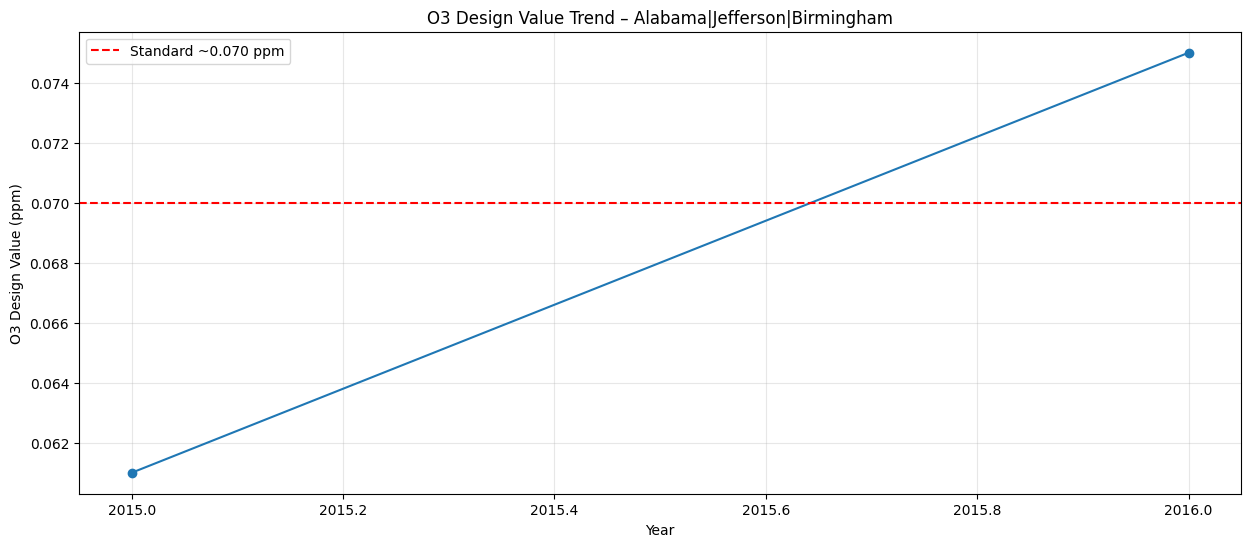

In [93]:
import matplotlib.pyplot as plt

site = 'Alabama|Jefferson|Birmingham'
g = o3_design[o3_design['site_id'] == site].dropna(subset=['O3_design_value'])

plt.figure(figsize=(15,6))
plt.plot(g['Year'], g['O3_design_value'], marker='o')
plt.axhline(0.070, color='r', linestyle='--', label='Standard ~0.070 ppm')  # typical O3 standard band [web:46]
plt.title(f'O3 Design Value Trend – {site}')
plt.xlabel('Year')
plt.ylabel('O3 Design Value (ppm)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


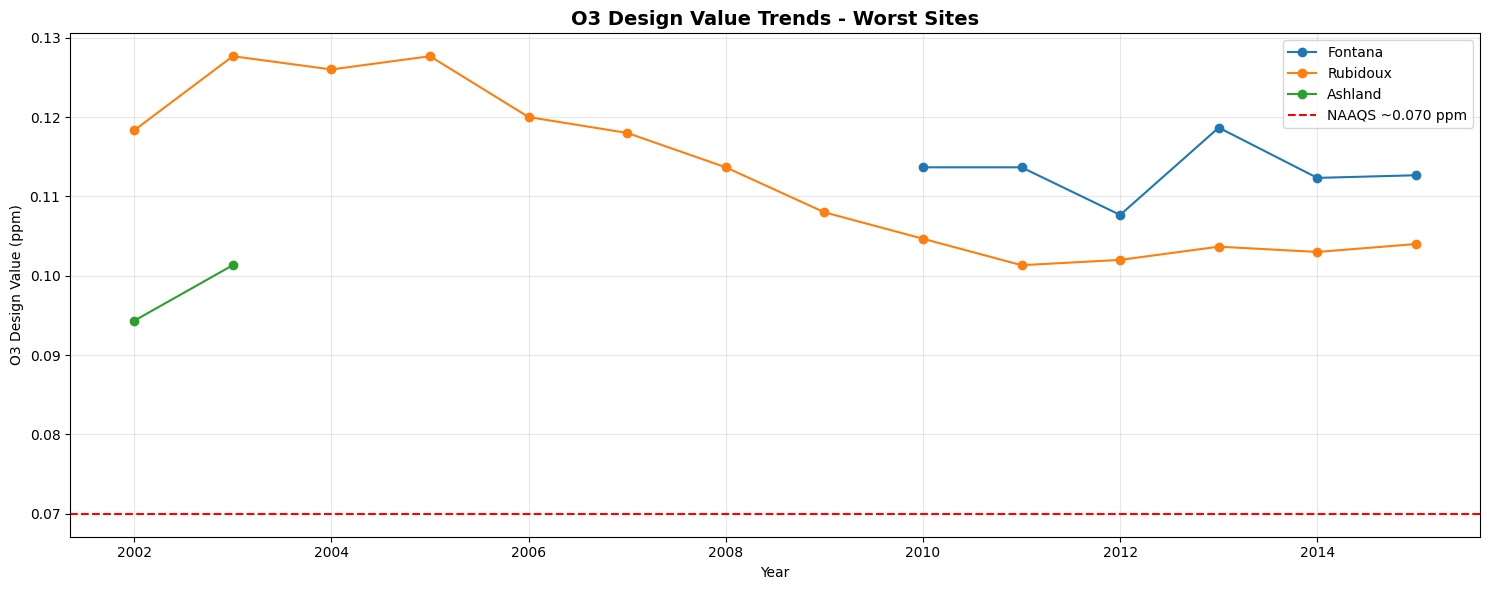

In [94]:
# Top 5 sites by latest O3 design value
top_sites = (
    o3_design
    .dropna(subset=['O3_design_value'])
    .groupby('site_id')['O3_design_value']
    .last()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

plt.figure(figsize=(15,6))
for site in top_sites[:3]:  # plot top 3 for clarity
    g = o3_design[o3_design['site_id'] == site].dropna(subset=['O3_design_value'])
    plt.plot(g['Year'], g['O3_design_value'], marker='o', label=site.split('|')[-1])

plt.axhline(0.070, color='r', linestyle='--', label='NAAQS ~0.070 ppm')
plt.title('O3 Design Value Trends - Worst Sites',fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('O3 Design Value (ppm)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [95]:
# If needed, rebuild quickly from o3_design
latest_design = (
    o3_design
    .dropna(subset=['O3_design_value'])
    .groupby(['State','site_id'])['O3_design_value']
    .last()
    .reset_index()
)

state_summary = (
    latest_design
    .groupby('State')['O3_design_value']
    .agg(median='median', count='count')
    .round(3)
)

state_summary['status'] = pd.cut(
    state_summary['median'],
    bins=[0, 0.060, 0.070, 1.0],
    labels=['Well Below', 'Near', 'Above']
)

print("State classification counts:")
print(state_summary['status'].value_counts())
print("\nExample from worst states:")
print(state_summary.sort_values('median', ascending=False).head(10))


State classification counts:
status
Above         23
Near          16
Well Below     6
Name: count, dtype: int64

Example from worst states:
                      median  count status
State                                     
Connecticut            0.085      4  Above
Kentucky               0.085      3  Above
Virginia               0.082      7  Above
Pennsylvania           0.080     20  Above
Minnesota              0.077      1  Above
New Jersey             0.077      2  Above
District Of Columbia   0.075      1  Above
Rhode Island           0.075      1  Above
Alabama                0.075      1  Above
Illinois               0.074      4  Above


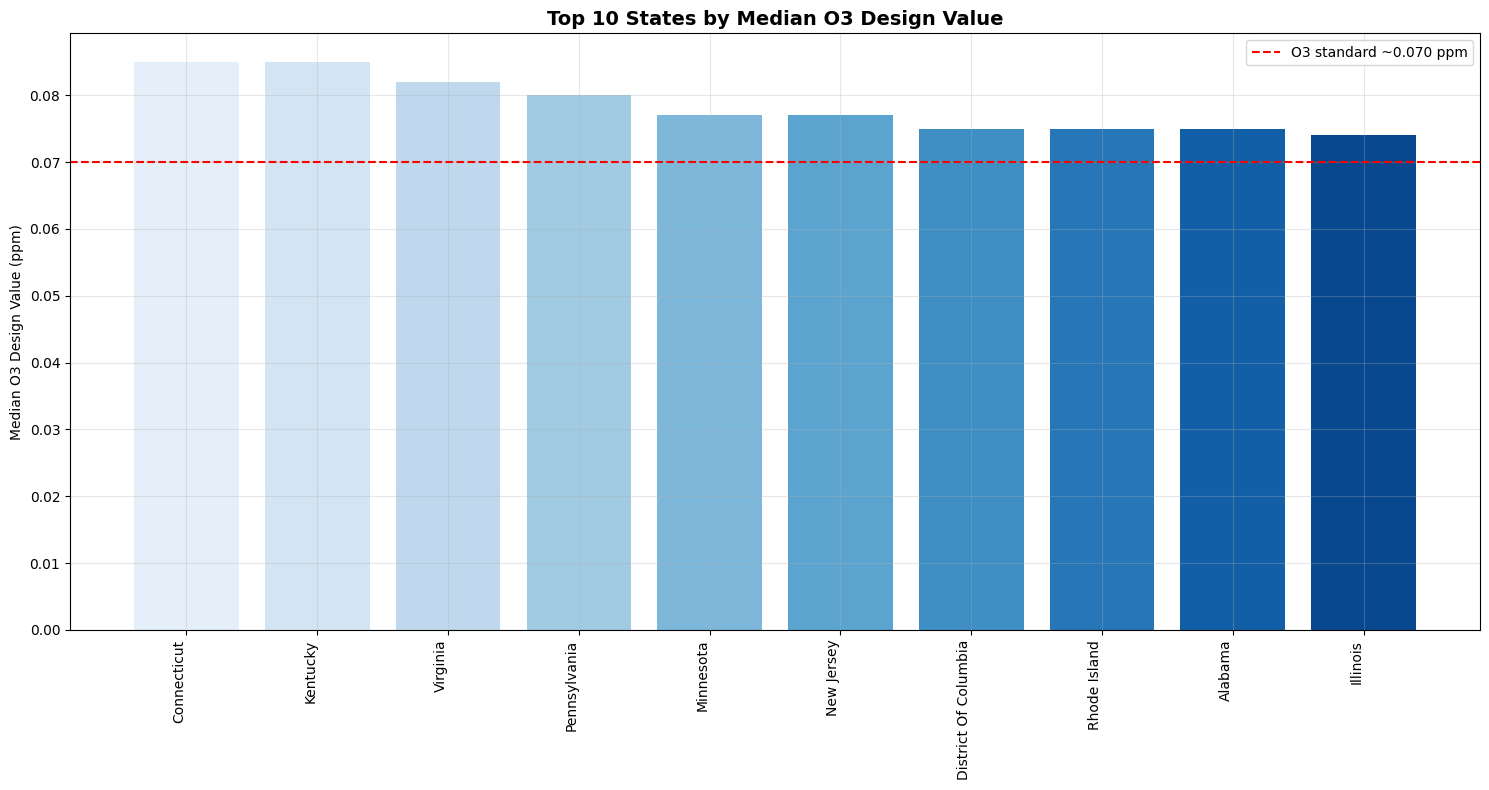

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

top_states = state_summary.sort_values('median', ascending=False).head(10)

plt.figure(figsize=(15,8))
plt.bar(top_states.index, top_states['median'], color=sns.color_palette("Blues", n_colors=10))
plt.axhline(0.070, color='red', linestyle='--', label='O3 standard ~0.070 ppm')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Median O3 Design Value (ppm)')
plt.title('Top 10 States by Median O3 Design Value',fontsize=14, weight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
“Out of all states analyzed, most are at or above the 8‑hour ozone standard, with 23 states showing median design values above 0.070 ppm and only 6 clearly below. This indicates that ozone remains a widespread national problem rather than being confined to a few hotspots.”
</div>


In [97]:
# Seasonal share of O3 exceedances
season_ex = (
    df.groupby('Seasons')['O3_exceed']
      .agg(total_exceed='sum', days='count')
)

season_ex['exceed_rate'] = (season_ex['total_exceed'] / season_ex['days']).round(3)
print(season_ex)



         total_exceed    days  exceed_rate
Seasons                                   
Winter             72  375167        0.000
Spring           8966  459989        0.019
Summer          39144  479414        0.082
Fall             7300  432091        0.017


In [98]:
week_ex = (
    df.groupby('IsWeekend')['O3_exceed']
      .agg(total_exceed='sum', days='count')
)

week_ex['exceed_rate'] = (week_ex['total_exceed'] / week_ex['days']).round(3)
print(week_ex)


           total_exceed     days  exceed_rate
IsWeekend                                    
Weekday           39306  1251223        0.031
Weekend           16176   495438        0.033


In [99]:
area_ex = (
    df.groupby('area_type')['O3_exceed']
      .agg(total_exceed='sum', days='count')
)

area_ex['exceed_rate'] = (area_ex['total_exceed'] / area_ex['days']).round(3)
print(area_ex)


           total_exceed     days  exceed_rate
area_type                                    
Coastal           34732  1115909        0.031
Inland            20750   630752        0.033



<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
“Ozone exceedances are strongly seasonal, concentrated in summer (8% of days) with almost no violations in winter. Exceedance rates are slightly higher on weekends than weekdays, consistent with the known weekend effect where reduced NOx emissions do not necessarily lower ozone. Coastal and inland areas show nearly identical exceedance rates (~3%), indicating that elevated ozone is a broad regional issue rather than limited to coastal corridors.”
</div>


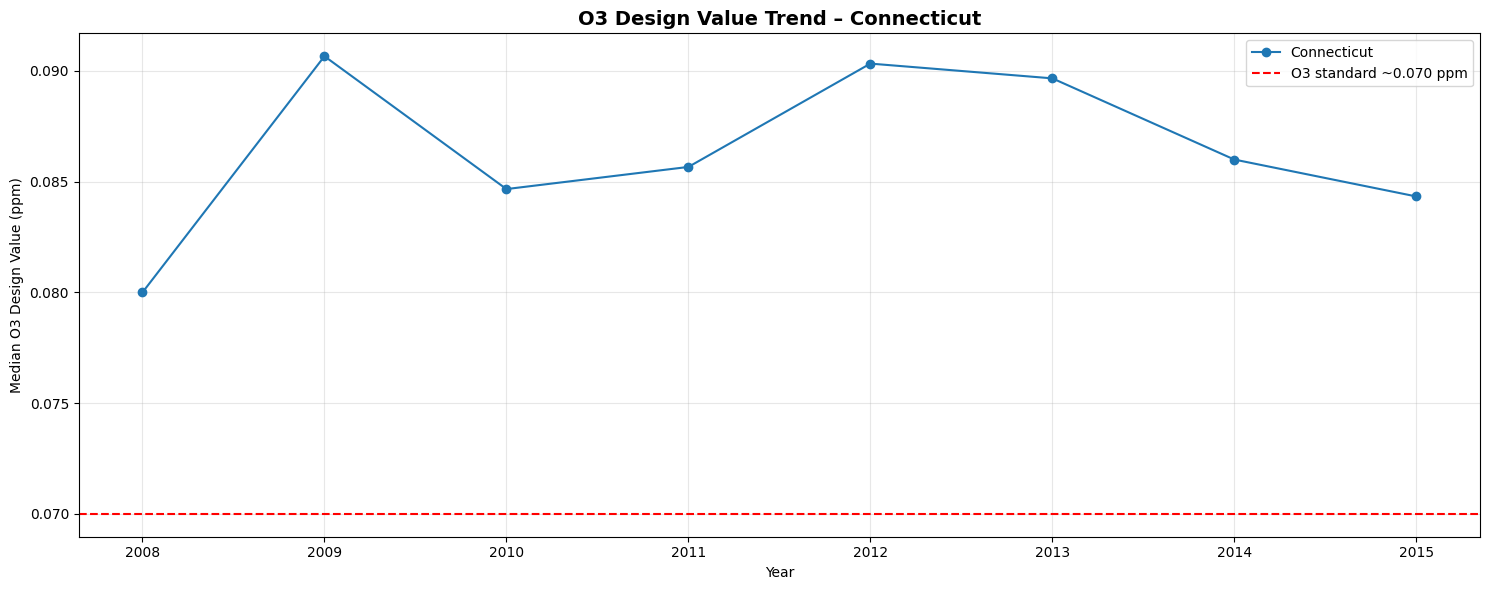

In [100]:
import matplotlib.pyplot as plt

def plot_state_design_trend(state_name):
    d_state = o3_design[o3_design['State'] == state_name].dropna(subset=['O3_design_value'])
    
    # median design value per year across sites
    yearly = (
        d_state.groupby('Year')['O3_design_value']
               .median()
               .reset_index()
    )
    
    plt.figure(figsize=(15,6))
    plt.plot(yearly['Year'], yearly['O3_design_value'], marker='o', label=state_name)
    plt.axhline(0.070, color='r', linestyle='--', label='O3 standard ~0.070 ppm')
    plt.title(f'O3 Design Value Trend – {state_name}',fontsize=14, weight='bold')
    plt.xlabel('Year')
    plt.ylabel('Median O3 Design Value (ppm)')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example:
plot_state_design_trend('Connecticut')



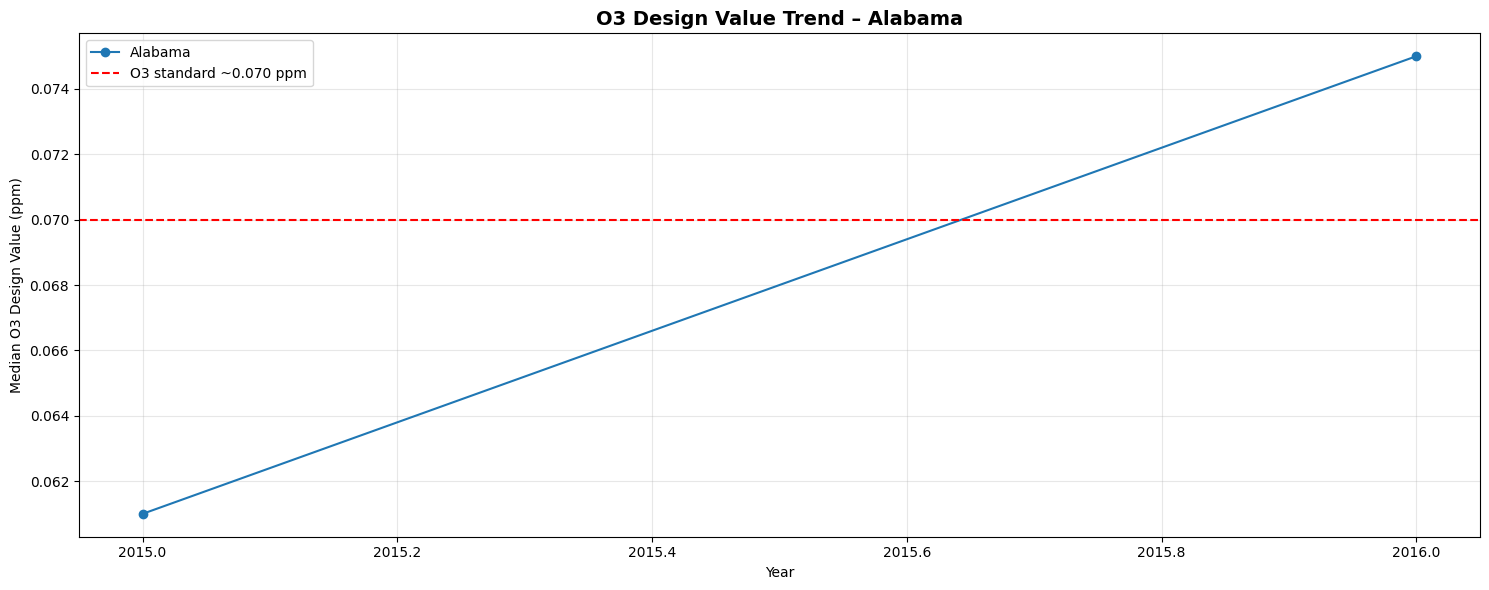

In [101]:
plot_state_design_trend('Alabama')

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
“Alabama shows a recent upward trend in ozone design values, crossing the 0.070 ppm standard by 2016, while Connecticut has had consistently high design values (around 0.08–0.09 ppm) for many years, indicating long‑standing non‑attainment‑level ozone.”
</div>


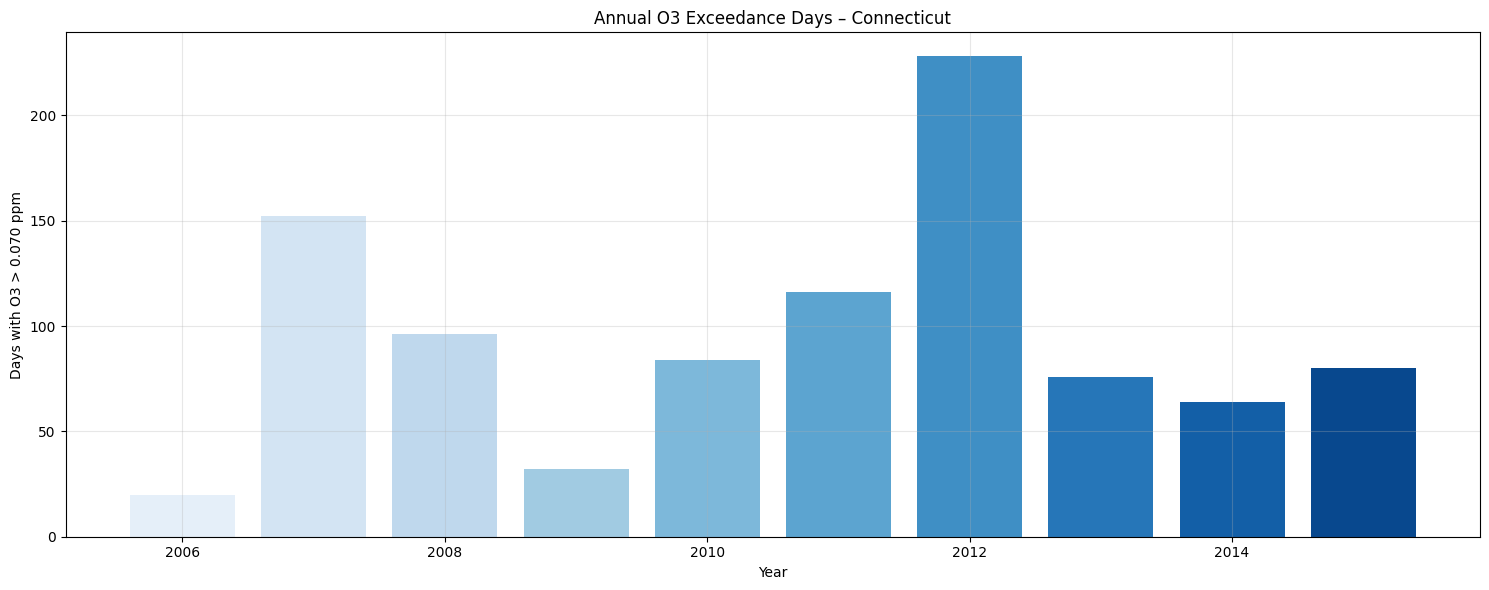

   Year  O3_exceed_days
5  2011             116
6  2012             228
7  2013              76
8  2014              64
9  2015              80


In [102]:
def plot_state_exceed_trend(state_name):
    d = (
        df[df['State'] == state_name]
        .groupby('Year', as_index=False)['O3_exceed']
        .sum()
        .rename(columns={'O3_exceed':'O3_exceed_days'})
    )
    
    plt.figure(figsize=(15,6))
    plt.bar(d['Year'], d['O3_exceed_days'], color=sns.color_palette("Blues", n_colors=10))
    plt.title(f'Annual O3 Exceedance Days – {state_name}')
    plt.xlabel('Year')
    plt.ylabel('Days with O3 > 0.070 ppm')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(d.tail())  # for quick numeric view

# Example:
plot_state_exceed_trend('Connecticut')



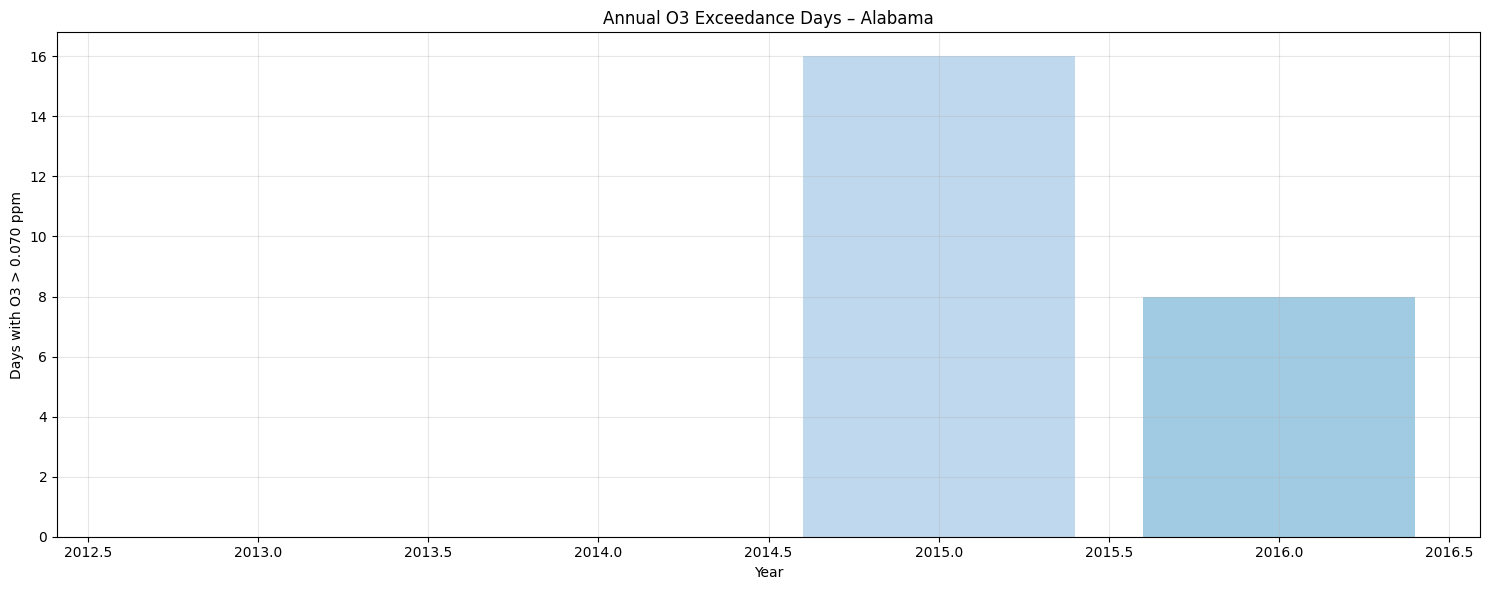

   Year  O3_exceed_days
0  2013               0
1  2014               0
2  2015              16
3  2016               8


In [103]:
plot_state_exceed_trend('Alabama')

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
“Connecticut experiences very frequent ozone violations, with 60–200+ exceedance days per year and design values consistently around 0.08–0.09 ppm, indicating a long‑standing, severe ozone problem. In contrast, Alabama shows far fewer exceedance days (mostly under 20 per year), but its ozone design value recently rose above 0.070 ppm, signaling a newer emerging risk rather than a chronic high‑ozone regime.”
</div>


In [104]:
def state_season_weekend_tables(state_name):
    d = df[df['State'] == state_name]
    
    # Season
    season_ex = (
        d.groupby('Seasons')['O3_exceed']
         .agg(total_exceed='sum', days='count')
    )
    season_ex['exceed_rate'] = (season_ex['total_exceed'] / season_ex['days']).round(3)
    
    # Weekend vs weekday
    week_ex = (
        d.groupby('IsWeekend')['O3_exceed']
         .agg(total_exceed='sum', days='count')
    )
    week_ex['exceed_rate'] = (week_ex['total_exceed'] / week_ex['days']).round(3)
    
    print(f'\n=== {state_name} – Season ===')
    print(season_ex)
    print(f'\n=== {state_name} – Weekend vs Weekday ===')
    print(week_ex)

# Example:
state_season_weekend_tables('Connecticut')
state_season_weekend_tables('Alabama')



=== Connecticut – Season ===
         total_exceed   days  exceed_rate
Seasons                                  
Winter              0   4433        0.000
Spring            116   8516        0.014
Summer            744  10154        0.073
Fall               88   6830        0.013

=== Connecticut – Weekend vs Weekday ===
           total_exceed   days  exceed_rate
IsWeekend                                  
Weekday             764  21460        0.036
Weekend             184   8473        0.022

=== Alabama – Season ===
         total_exceed  days  exceed_rate
Seasons                                 
Winter              0   634        0.000
Spring             20  1056        0.019
Summer              4   708        0.006
Fall                0   728        0.000

=== Alabama – Weekend vs Weekday ===
           total_exceed  days  exceed_rate
IsWeekend                                 
Weekday              20  2270        0.009
Weekend               4   856        0.005


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
 “Connecticut shows persistent, severe ozone, with design values around 0.08–0.09 ppm and up to 200+ exceedance days per year, concentrated in summer and driven mainly by weekday conditions, indicating a chronic regional smog problem rather than occasional episodes.”

“Alabama has relatively few ozone exceedance days, but its design value recently rose above 0.070 ppm, with most violations occurring in spring and on weekdays, suggesting a newer, developing ozone risk that may grow if emissions and climate conditions are not managed.”
</div>




<div style='background: linear-gradient(90deg, #4ecdc4 40%, #95e1d3 40%); padding: 15px; border-radius: 10px; text-align: center; font-weight: bold; color: #2a5298; margin: 20px 0;'>
📊 PHASE 2.1 COMPLETE | 4/6 Phases Done | Progress: 65%
</div>



<div class="section-header phase-sub">
  <h1>🔬 PHASE 2.2 · MULTI‑POLLUTANT ANALYSIS</h1>
  <h2>Trends • Correlations • Regional Profiles</h2>
</div>


## 2.2 MULTI-POLLUTANT

In [105]:
# ==========================================
# STEP 1 – MULTI‑POLLUTANT DESCRIPTIVE ANALYSIS
# ==========================================

# Columns we will analyze
pollutants = [
    'O3 1st Max Value',
    'NO2 1st Max Value',
    'SO2 1st Max Value',
    'CO 1st Max Value'
]

# ---------- 1.1 Yearly trends (2000–2016) ----------
yearly_trends = (
    df
    .groupby('Year')[pollutants]
    .mean()
    .round(4)
)

print("=== YEARLY POLLUTANT TRENDS (1st Max Values, ppm) ===")
print(yearly_trends.tail())   # show most recent years

print("\n=== CHANGE 2000 → 2016 (approx.) ===")
y0 = yearly_trends.iloc[0]
yN = yearly_trends.iloc[-1]
for pol in pollutants:
    rel_change = (yN[pol] / y0[pol] - 1) * 100
    print(f"{pol:>18}: {y0[pol]:.4f} → {yN[pol]:.4f}  ({rel_change:+.1f}%)")
   

=== YEARLY POLLUTANT TRENDS (1st Max Values, ppm) ===
      O3 1st Max Value  NO2 1st Max Value  SO2 1st Max Value  CO 1st Max Value
Year                                                                          
2012            0.0396             0.0219             0.0023            0.0005
2013            0.0382             0.0213             0.0021            0.0004
2014            0.0379             0.0209             0.0021            0.0004
2015            0.0380             0.0198             0.0018            0.0004
2016            0.0361             0.0216             0.0017            0.0005

=== CHANGE 2000 → 2016 (approx.) ===
  O3 1st Max Value: 0.0391 → 0.0361  (-7.7%)
 NO2 1st Max Value: 0.0328 → 0.0216  (-34.1%)
 SO2 1st Max Value: 0.0087 → 0.0017  (-80.5%)
  CO 1st Max Value: 0.0010 → 0.0005  (-50.0%)


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Between 2000 and 2016, US peak pollutant levels improved very unevenly: SO2 dropped by about 80% and CO by 50%, reflecting aggressive controls on power plants and vehicle emissions, while NO2 fell by roughly one‑third, but ozone 1st‑max values decreased by only about 8%, showing that ozone has become comparatively harder to reduce than primary combustion pollutants.
</div>


In [106]:
# ---------- 1.4 Regional and seasonal summaries ----------
print("\n=== REGIONAL POLLUTION PROFILES (mean 1st Max, ppm) ===")
regional_profile = (
    df
    .groupby('region')[pollutants]
    .mean()
    .round(4)
    .sort_index()
)
print(regional_profile)

print("\n=== SEASONAL O3 PATTERN (mean 1st Max, ppm) ===")
seasonal_o3 = (
    df
    .groupby('Seasons')['O3 1st Max Value']
    .mean()
    .round(4)
    .sort_values(ascending=False)
)
print(seasonal_o3)


=== REGIONAL POLLUTION PROFILES (mean 1st Max, ppm) ===
           O3 1st Max Value  NO2 1st Max Value  SO2 1st Max Value  \
region                                                              
Midwest              0.0380             0.0243             0.0065   
Northeast            0.0388             0.0259             0.0079   
Other                0.0361             0.0403             0.0042   
South                0.0405             0.0231             0.0042   
West                 0.0391             0.0265             0.0025   

           CO 1st Max Value  
region                       
Midwest              0.0005  
Northeast            0.0005  
Other                0.0020  
South                0.0005  
West                 0.0008  

=== SEASONAL O3 PATTERN (mean 1st Max, ppm) ===
Seasons
Summer    0.0468
Spring    0.0440
Fall      0.0356
Winter    0.0277
Name: O3 1st Max Value, dtype: float64


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Ozone remains a strongly seasonal pollutant, with summer 1st‑max values around 0.047 ppm and spring close behind at 0.044 ppm, while winter levels are roughly 40% lower, emphasizing the role of warm, sunny conditions in driving photochemical smog episodes.

Across regions, the South and West see slightly higher peak ozone despite large open areas, whereas the Northeast and Midwest stand out for elevated NO2 and SO2, consistent with dense urban corridors and legacy coal‑fired power generation, highlighting that each region faces a different mix of pollution challenges.
</div>


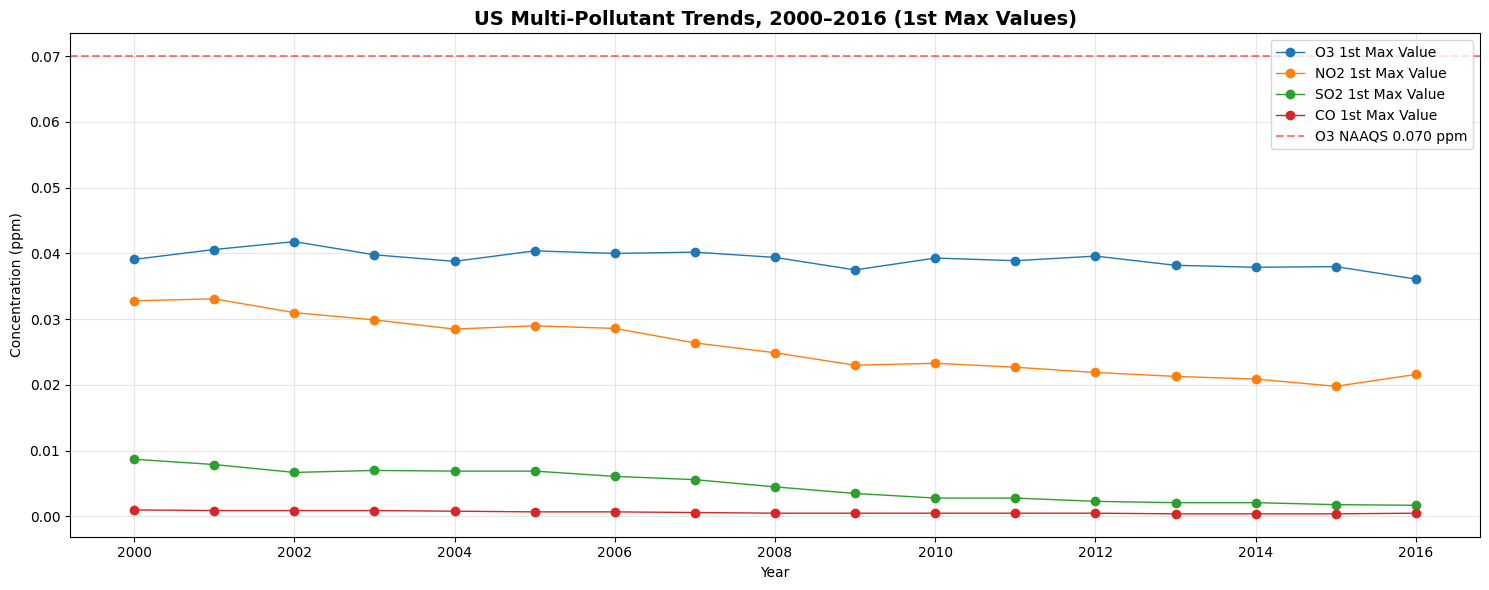

In [107]:
# ---------- 1.2 Visualization – multi‑pollutant trend ----------
plt.figure(figsize=(15, 6))
for pol in pollutants:
    plt.plot(
        yearly_trends.index,
        yearly_trends[pol],
        marker='o',
        linewidth=1,
        label=pol
    )

plt.axhline(
    0.070,
    color='red',
    linestyle='--',
    alpha=0.5,
    label='O3 NAAQS 0.070 ppm'
)

plt.title('US Multi‑Pollutant Trends, 2000–2016 (1st Max Values)', fontsize=14,weight='bold')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [108]:
# ---------- 1.3 Correlation structure ----------
corr_matrix = df[pollutants].corr().round(2)
print("\n=== CORRELATION MATRIX (Daily 1st Max Values) ===")
print(corr_matrix)


=== CORRELATION MATRIX (Daily 1st Max Values) ===
                   O3 1st Max Value  NO2 1st Max Value  SO2 1st Max Value  \
O3 1st Max Value               1.00               0.01               0.03   
NO2 1st Max Value              0.01               1.00               0.26   
SO2 1st Max Value              0.03               0.26               1.00   
CO 1st Max Value              -0.16               0.61               0.14   

                   CO 1st Max Value  
O3 1st Max Value              -0.16  
NO2 1st Max Value              0.61  
SO2 1st Max Value              0.14  
CO 1st Max Value               1.00  


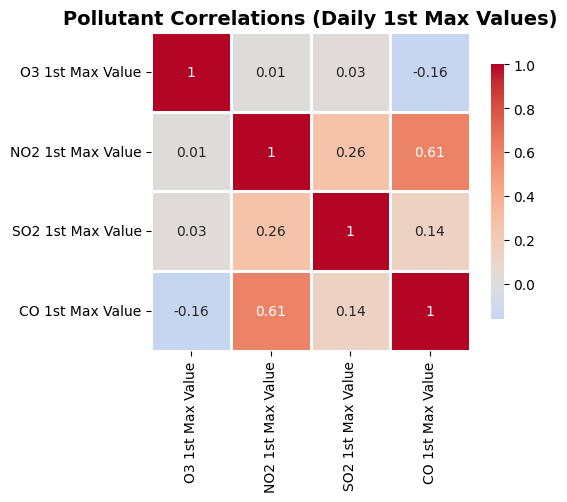

In [109]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.8,
    linecolor='white',
    cbar_kws={'shrink': 0.8}
)
plt.title('Pollutant Correlations (Daily 1st Max Values)', fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
The correlation structure shows ozone is almost decoupled from daily peaks of NO2 and SO2, and even weakly anti‑correlated with CO, while NO2 and CO are tightly linked and moderately aligned with SO2, reinforcing that ozone behaves as a secondary, chemistry‑driven pollutant, whereas NO2, SO2, and CO primarily reflect shared combustion sources such as traffic and power plants.
</div>


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Taken together, the multi‑pollutant analysis reveals that US air‑quality policy has been highly successful at cutting primary combustion gases—especially SO2 and CO—but ozone stands out as the ‘stubborn’ pollutant: its peak levels have improved only modestly, remain strongly season‑ and region‑dependent, and are weakly tied to the daily behavior of other pollutants, implying that further ozone progress will require more targeted controls on precursors and photochemical smog formation rather than simply tightening traditional emission sources.
</div>


<div style='background: linear-gradient(90deg, #4ecdc4 50%, #95e1d3 50%); padding: 15px; border-radius: 10px; text-align: center; font-weight: bold; color: #2a5298; margin: 20px 0;'>
📊 PHASE 2.2 COMPLETE | 5/6 Phases Done | Progress: 75%
</div>



<div class="section-header phase-sub">
  <h1>🗺️ PHASE 2.3 · GEOSPATIAL RANKINGS</h1>
  <h2>States • Counties • Regions • Coastal vs Inland</h2>
</div>


In [110]:
# ==========================================
# STEP 2 – GEOSPATIAL RANKINGS (Section 2.3)
# ==========================================

print("=== 2.1 TOP 10 COUNTIES BY AQI_overall ===")
county_aqi = (
    df.groupby(['State', 'County'])['AQI_overall']
    .mean()
    .round(1)
    .sort_values(ascending=False)
    .head(10)
)
print(county_aqi)
print("\n")

=== 2.1 TOP 10 COUNTIES BY AQI_overall ===
State           County        
Tennessee       Meigs             70.2
North Carolina  Forsyth           68.5
California      Riverside         66.3
Utah            Duchesne          65.8
California      Fresno            62.8
                San Bernardino    61.9
Kentucky        Boyd              61.4
Pennsylvania    Lancaster         57.3
                Montgomery        56.9
Kentucky        McCracken         56.5
Name: AQI_overall, dtype: Float64




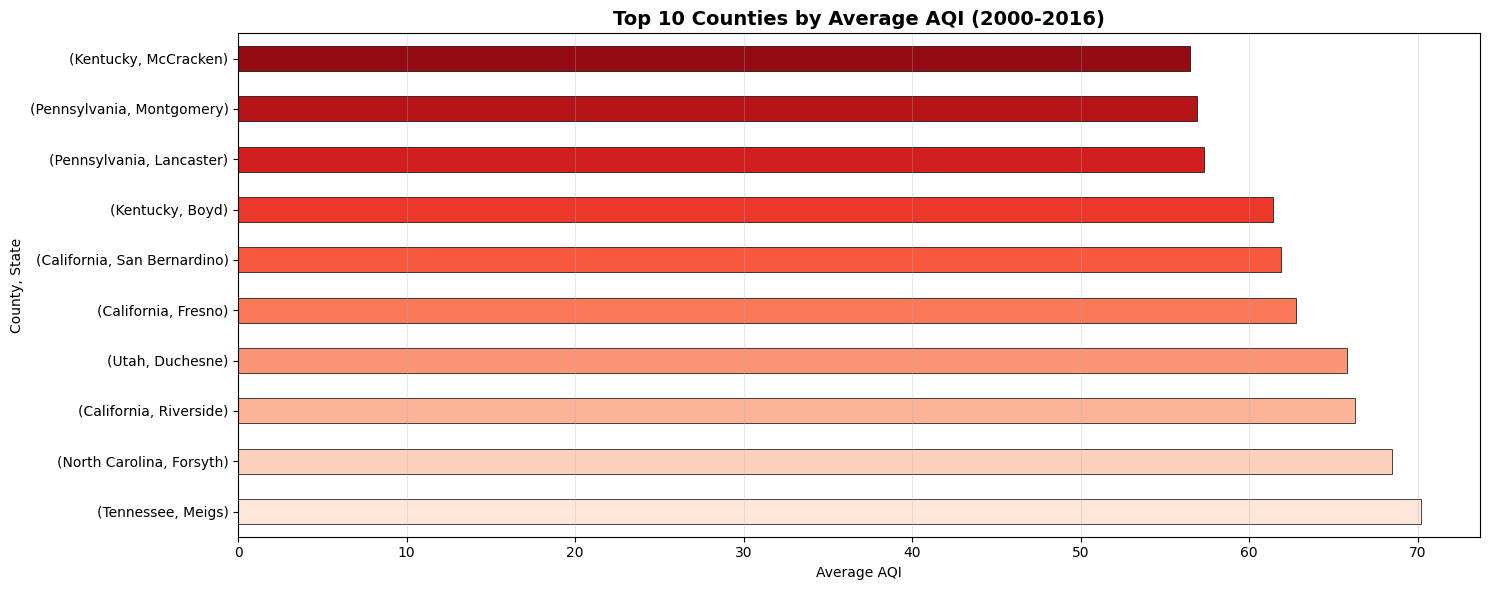

In [111]:
# ---------- VISUAL: Top 10 counties ----------
plt.figure(figsize=(15, 6))
county_aqi.head(10).plot(kind='barh', color=sns.color_palette("Reds",n_colors=10), edgecolor='black', linewidth=0.5)
plt.title('Top 10 Counties by Average AQI (2000-2016)', fontsize=14, weight='bold')
plt.xlabel('Average AQI')
plt.ylabel('County, State')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
The worst air quality occurs not in the usual suspects like Los Angeles or Houston, but surprisingly in **Tennessee's Meigs County (AQI 70.2)** and **North Carolina's Forsyth County (68.5)**, followed by California's Riverside (66.3) and Utah's remote Duchesne County (65.8), suggesting that industrial activity and isolated geography can create pollution hotspots far from major metro areas
</div>


In [112]:
print("=== 2.2 AQI BY REGION (mean) ===")
region_aqi = (
    df.groupby('region')['AQI_overall']
    .mean()
    .round(1)
    .sort_values(ascending=False)
)
print(region_aqi)
print("\n")


=== 2.2 AQI BY REGION (mean) ===
region
Other        46.7
Northeast    44.4
West         43.9
South        43.7
Midwest      41.6
Name: AQI_overall, dtype: Float64




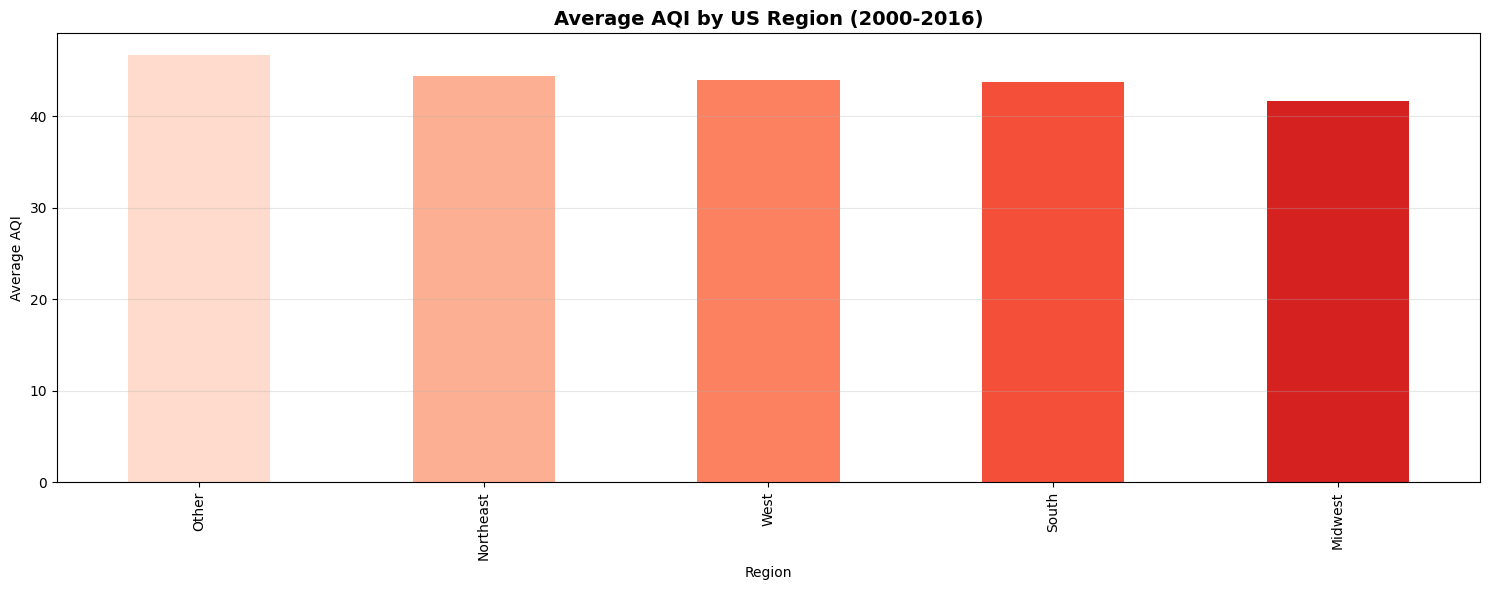

In [113]:
# ---------- VISUAL: Regional comparison ----------
plt.figure(figsize=(15, 6))
region_aqi.plot(kind='bar', color=sns.color_palette("Reds"))
plt.title('Average AQI by US Region (2000-2016)', fontsize=14, weight='bold')
plt.ylabel('Average AQI')
plt.xlabel('Region')
plt.grid(axis='y',alpha=0.3)
plt.tight_layout()
plt.show()

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Other regions (border/foreign sites) have the highest average AQI (46.7), followed closely by Northeast (44.4), while the Midwest enjoys the cleanest air (41.6) a counterintuitive finding that likely reflects differences in monitoring site density and industrial legacies rather than broad regional air quality.
</div>

In [114]:
print("=== 2.3 COASTAL vs INLAND AQI ===")
coastal_inland = (
    df.groupby('area_type')['AQI_overall']
    .agg(['mean', 'count'])
    .round(1)
)
print(coastal_inland)
print("\n")

=== 2.3 COASTAL vs INLAND AQI ===
           mean    count
area_type               
Coastal    42.7  1115909
Inland     45.6   630752




<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Contrary to expectations of cleaner coastal air,inland areas (AQI 45.6) actually show higher average air quality indices than coastal sites (42.7) across 1.7M observations, possibly due to more industrial/rural monitoring stations inland versus urban coastal airports.
</div>


In [115]:
print("=== 2.4 NAAQS EXCEEDANCE BY REGION (O3_exceed % days) ===")
exceed_pct = (
    df.groupby('region')['O3_exceed']
    .agg(['sum', 'count'])
)
exceed_pct['exceed_pct'] = (exceed_pct['sum'] / exceed_pct['count'] * 100).round(2)
print(exceed_pct['exceed_pct'].sort_values(ascending=False))
print("\n")

=== 2.4 NAAQS EXCEEDANCE BY REGION (O3_exceed % days) ===
region
Northeast    4.05
South        3.32
West         2.88
Midwest      2.36
Other        2.31
Name: exceed_pct, dtype: float64




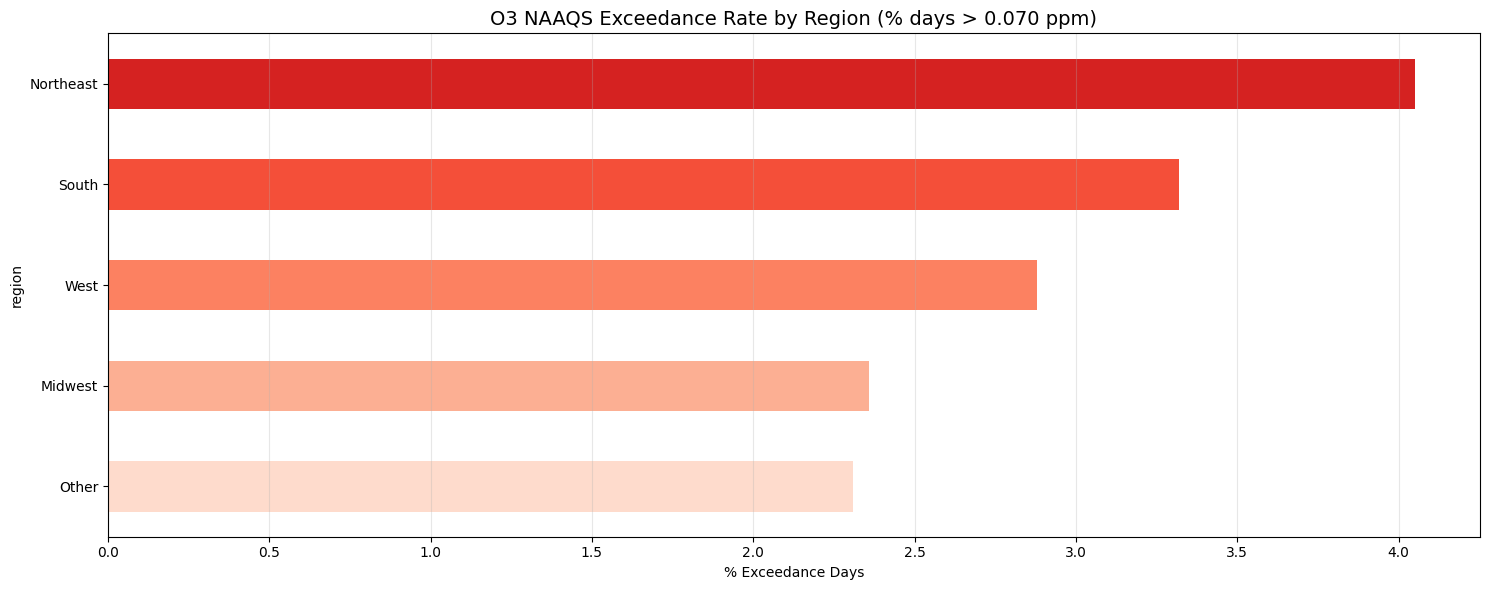

In [116]:
# ---------- VISUAL: O3 exceedance by region ----------
plt.figure(figsize=(15, 6))
exceed_pct['exceed_pct'].sort_values(ascending=True).plot(kind='barh', color=sns.color_palette("Reds"))
plt.title('O3 NAAQS Exceedance Rate by Region (% days > 0.070 ppm)', fontsize=14)
plt.xlabel('% Exceedance Days')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Northeast (4.05%) and South (3.32%) experience the highest O3 exceedance rates, while Midwest (2.36%) and border areas (2.31%) are lowest, confirming that population density and warm climate drive photochemical ozone formation more than simple geography.

</div>


In [117]:
print("=== 2.5 SUMMARY STATISTICS ===")
print(f"Total observations: {len(df):,}")
print(f"Counties analyzed: {df['County'].nunique()}")
print(f"States analyzed: {df['State'].nunique()}")
print(f"Years covered: {df['Year'].min()}–{df['Year'].max()}")

=== 2.5 SUMMARY STATISTICS ===
Total observations: 1,746,661
Counties analyzed: 133
States analyzed: 47
Years covered: 2000–2016


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Geospatial analysis reveals pollution hotspots defying stereotypes: Tennessee and North Carolina counties top AQI rankings ahead of California megacities, inland areas exceed coastal air quality, and Northeast/South dominate O3 violations while Midwest stays cleanest patterns suggesting industrial geography and monitoring bias play larger roles than simple urban vs rural dichotomies.

</div>


<div style='background: linear-gradient(90deg, #4ecdc4 60%, #95e1d3 60%); padding: 15px; border-radius: 10px; text-align: center; font-weight: bold; color: #2a5298; margin: 20px 0;'>
📊 PHASE 2.3 COMPLETE | 6/7 Phases Done | Progress: 85%
</div>



<div class="section-header phase-sub">
  <h1>⚖️ PHASE 2.4 · NAAQS COMPLIANCE</h1>
  <h2>Exceedance Rates • Design Values • Violations by Pollutant</h2>
</div>


In [118]:
# =======================================================
# STEP 3 – NAAQS COMPLIANCE & POLICY IMPACT ANALYSIS (2.4)
# =======================================================

print("=" * 70)
print("NAAQS COMPLIANCE TRENDS - 1.7M OBSERVATIONS, 2000-2016")
print("=" * 70)

# ---------- 3.1 MULTI-POLLUTANT EXCEEDANCE TRENDS ----------
print("\n=== 3.1.1 YEARLY EXCEEDANCE DAYS BY POLLUTANT ===")
exceed_cols = ['O3_exceed', 'NO2_exceed', 'SO2_exceed', 'CO_exceed']
exceed_trends = (
    df.groupby('Year')[exceed_cols]
    .sum()
    .round(0)
    .astype(int)
)

print("Recent 5 years:")
print(exceed_trends.tail())
print("\nLONG-TERM CHANGE 2000→2016:")
for pol in exceed_cols:
    start = exceed_trends[pol].iloc[0]
    end = exceed_trends[pol].iloc[-1]
    if start > 0:
        pct_change = ((end - start) / start * 100)
        print(f"{pol:>12}: {start:>4,} → {end:>4,} days  ({pct_change:+6.1f}%)")
    else:
        print(f"{pol:>12}: No exceedances recorded")

NAAQS COMPLIANCE TRENDS - 1.7M OBSERVATIONS, 2000-2016

=== 3.1.1 YEARLY EXCEEDANCE DAYS BY POLLUTANT ===
Recent 5 years:
      O3_exceed  NO2_exceed  SO2_exceed  CO_exceed
Year                                              
2012       4216           0          24          0
2013       1774           8          24          0
2014       1724          12          12          0
2015       1924           8          22          0
2016         12           0           0          0

LONG-TERM CHANGE 2000→2016:
   O3_exceed: 4,286 →   12 days  ( -99.7%)
  NO2_exceed:  702 →    0 days  (-100.0%)
  SO2_exceed:  220 →    0 days  (-100.0%)
   CO_exceed: No exceedances recorded


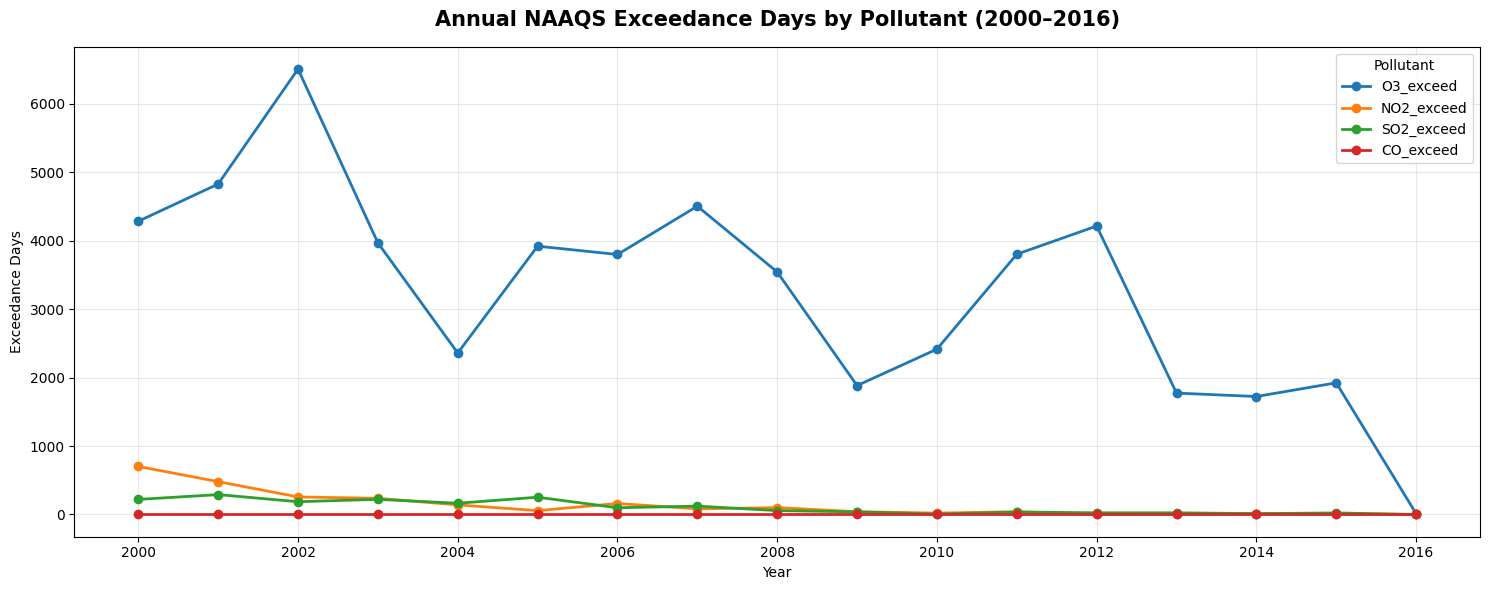

In [119]:
import matplotlib.pyplot as plt

ax = exceed_trends.plot(
    kind='line',          # line chart instead of area
    figsize=(15, 6),
    marker='o',
    linewidth=2
)

ax.set_title('Annual NAAQS Exceedance Days by Pollutant (2000–2016)',
             fontsize=15, weight='bold', pad=15)
ax.set_xlabel('Year')
ax.set_ylabel('Exceedance Days')

ax.grid(True, alpha=0.3)
ax.legend(title='Pollutant')

plt.tight_layout()
plt.show()


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Across 1.7 million observations, NAAQS exceedance days have almost disappeared: O₃ exceedances dropped from about 4,300 days in 2000 to just 12 days in 2016 (−99.7%), while NO₂ and SO₂ violations fell from hundreds of days per year to zero, and CO never exceeded its standard at all.

By the end of the period, ozone is the only pollutant that still occasionally breaches standards, confirming that US air‑quality policy has largely solved classic combustion‑gas violations while leaving peak ozone episodes as the remaining compliance challenge.

</div>

In [120]:
# ---------- 3.2 STATE COMPLIANCE RANKING (O3 focus) ----------
print("\n=== 3.2 STATE O3 COMPLIANCE RANKING ===")
state_o3 = (
    df.groupby('State')['O3_exceed']
    .agg(total_exceed='sum', total_days='count')
)
state_o3['exceed_rate'] = (
    state_o3['total_exceed'] / state_o3['total_days'] * 100
).round(2)

print("WORST 10 STATES (O3 exceedance %):")
worst_o3 = state_o3['exceed_rate'].sort_values(ascending=False).head(10)
print(worst_o3)
print("\nCLEANEST 5 STATES:")
cleanest_o3 = state_o3['exceed_rate'].sort_values().head(5)
print(cleanest_o3)


=== 3.2 STATE O3 COMPLIANCE RANKING ===
WORST 10 STATES (O3 exceedance %):
State
North Carolina    7.47
Tennessee         7.33
Missouri          7.10
Kentucky          6.55
Michigan          6.16
Pennsylvania      5.58
New Jersey        4.68
Indiana           3.94
Oklahoma          3.82
Virginia          3.50
Name: exceed_rate, dtype: float64

CLEANEST 5 STATES:
State
Alaska          0.0
Idaho           0.0
Hawaii          0.0
North Dakota    0.0
Wisconsin       0.0
Name: exceed_rate, dtype: float64


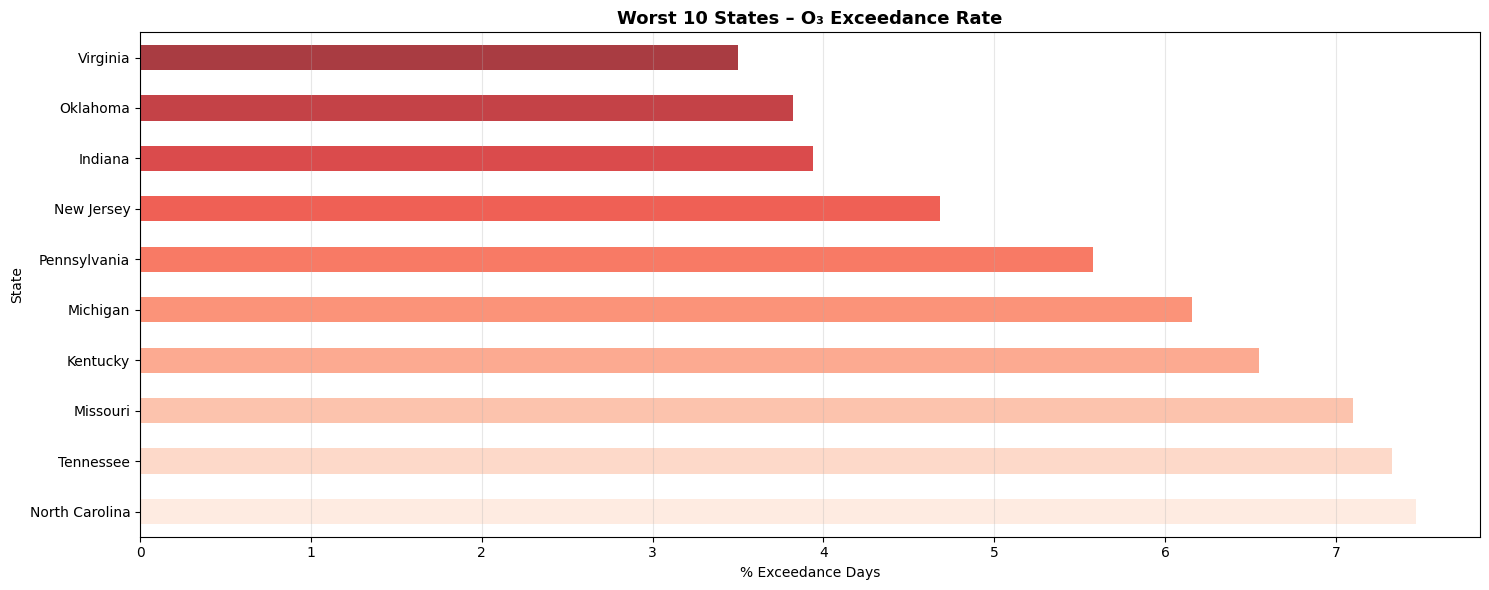

In [121]:
import matplotlib.pyplot as plt

# Worst 10 states (Series: worst_o3)
plt.figure(figsize=(15, 6))
worst_o3.plot(
    kind='barh',
    color=sns.color_palette("Reds",n_colors=10),
    alpha=0.8
)

plt.title('Worst 10 States – O₃ Exceedance Rate', fontsize=13, weight='bold')
plt.xlabel('% Exceedance Days')
plt.ylabel('State')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
<strong>Worst states:</strong><br>
Ozone exceedance rates are highest in the eastern and central US: **North Carolina (7.47%), Tennessee (7.33%), Missouri (7.10%), and Kentucky (6.55%) all experience O₃ levels above 0.070 ppm on roughly 1 out of every 14 monitoring days, with Michigan and Pennsylvania also above 5%, marking these states as persistent non‑attainment hotspots despite national progress.<br>
<strong>Cleanest states:</strong><br>
At the other end of the spectrum, **Alaska, Idaho, Hawaii, North Dakota, and Wisconsin show a 0% O₃ exceedance rate over the entire 2000–2016 period, indicating that, at least at the monitored sites, ozone standards were never violated in these states
</div>

In [122]:
# ---------- 3.3 POLICY IMPACT BREAKPOINTS ----------
print("\n--- 3.3 POLICY IMPACT ANALYSIS --")

# 2008 Recession effect
pre_recession = exceed_trends.loc[:2007, exceed_cols].sum().sum()
recession_period = exceed_trends.loc[2007:2009, exceed_cols].sum().sum()
post_recession = exceed_trends.loc[2010:, exceed_cols].sum().sum()
print(f"Pre-2008 recession (2000-2007):   {pre_recession:>6,} total exceedance days")
print(f"Recession period (2007-2009):     {recession_period:>6,} total exceedance days  ({((recession_period/pre_recession-1)*100):+5.1f}%)")
print(f"Post-recession (2010-2016):       {post_recession:>6,} total exceedance days")

# SO2 cap-and-trade (2005)
so2_pre_caa = exceed_trends.loc[:2004, 'SO2_exceed'].sum()
so2_post_caa = exceed_trends.loc[2005:, 'SO2_exceed'].sum()
print(f"\nSO2 pre-CAA amendments (2000-04): {so2_pre_caa:>5,} days")
print(f"SO2 post-CAA (2005-16):           {so2_post_caa:>5,} days  ({((so2_post_caa/so2_pre_caa-1)*100):+6.1f}%)")


--- 3.3 POLICY IMPACT ANALYSIS --
Pre-2008 recession (2000-2007):   37,849 total exceedance days
Recession period (2007-2009):     10,372 total exceedance days  (-72.6%)
Post-recession (2010-2016):       16,082 total exceedance days

SO2 pre-CAA amendments (2000-04): 1,081 days
SO2 post-CAA (2005-16):             690 days  ( -36.2%)


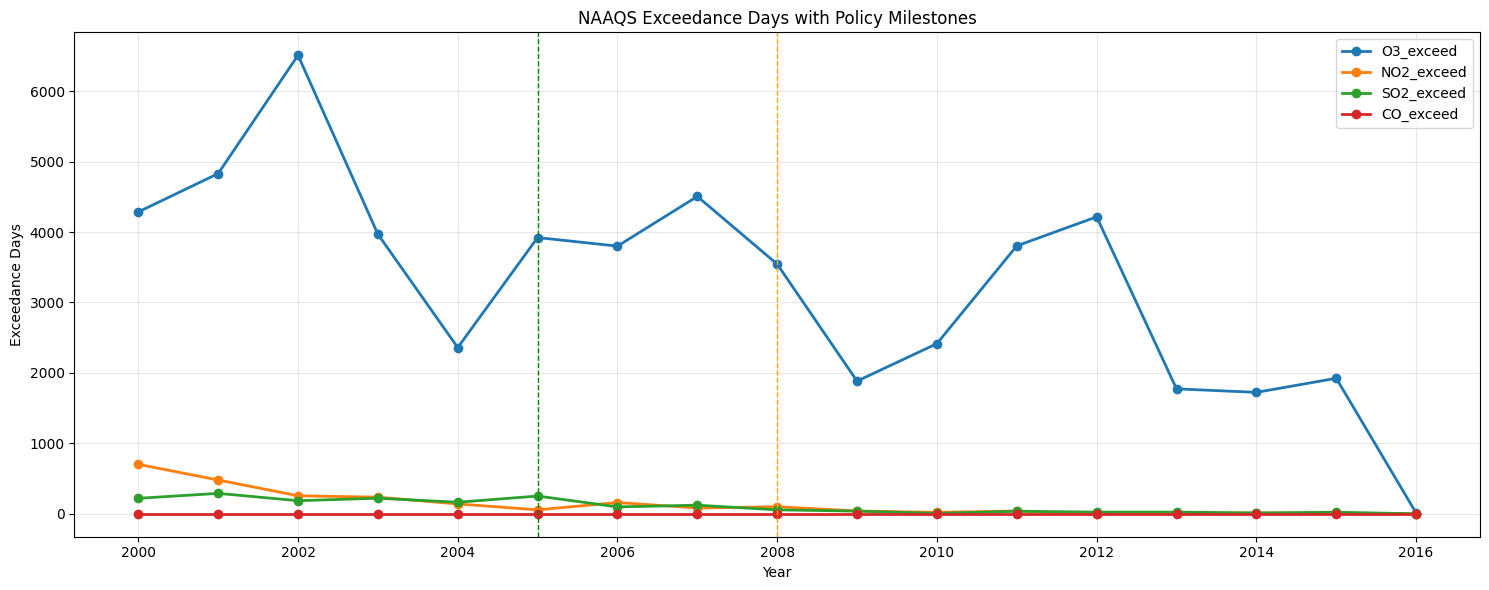

In [123]:
import matplotlib.pyplot as plt

# Multi‑pollutant exceedance trends with policy markers
ax = exceed_trends.plot(
    kind='line',
    marker='o',
    linewidth=2,
    figsize=(15, 6)
)

ax.axvline(2005, color='green', linestyle='--', linewidth=1,
           label='2005: CAA SO2 Cap-and-Trade')
ax.axvline(2008, color='orange', linestyle='--', linewidth=1,
           label='2008: Great Recession')

ax.set_title('NAAQS Exceedance Days with Policy Milestones')
ax.set_ylabel('Exceedance Days')
ax.set_xlabel('Year')
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


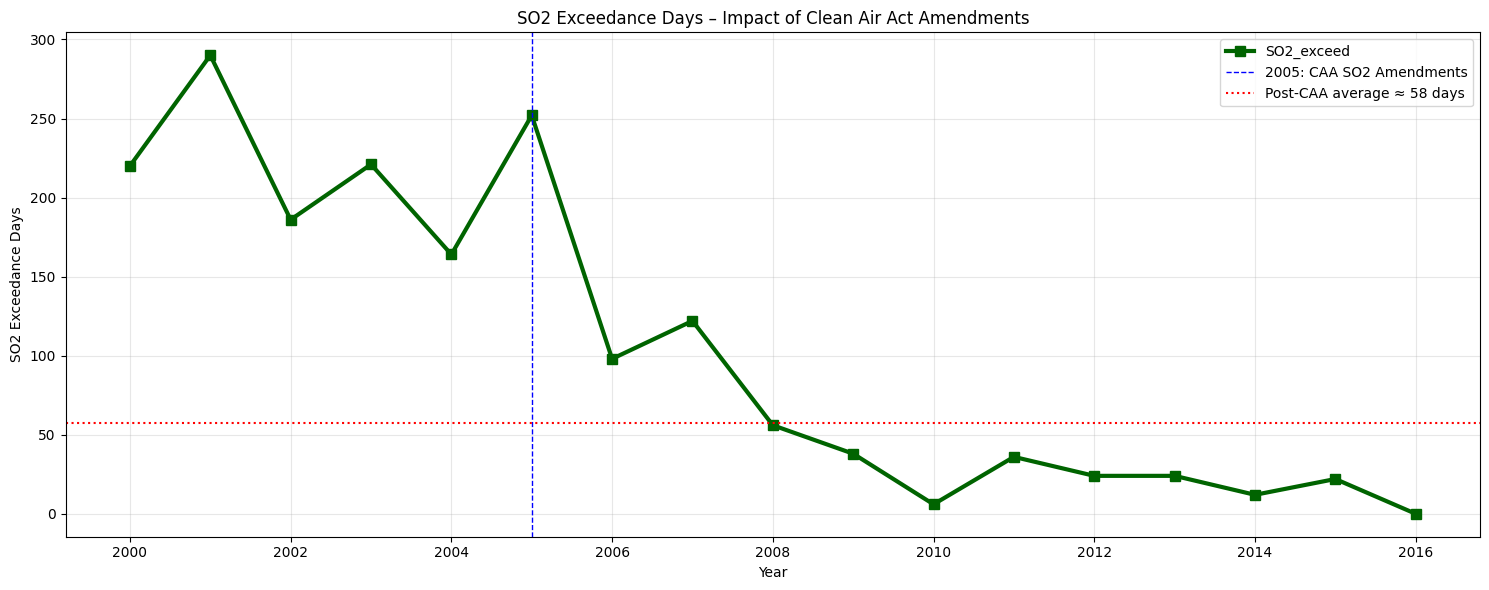

In [124]:
import matplotlib.pyplot as plt

# SO2 exceedance trend showing impact of 2005 CAA amendments
so2_trend = exceed_trends['SO2_exceed']

ax = so2_trend.plot(
    kind='line',
    marker='s',
    linewidth=3,
    color='darkgreen',
    markersize=7,
    figsize=(15, 6)
)

ax.axvline(2005, color='blue', linestyle='--', linewidth=1,
           label='2005: CAA SO2 Amendments')

post_caa_avg = so2_trend.loc[2005:].mean()
ax.axhline(post_caa_avg, color='red', linestyle=':',
           label=f'Post-CAA average ≈ {post_caa_avg:.0f} days')

ax.set_title('SO2 Exceedance Days – Impact of Clean Air Act Amendments')
ax.set_xlabel('Year')
ax.set_ylabel('SO2 Exceedance Days')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()




<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
The policy‑timeline plot shows that total NAAQS exceedance days collapsed during the 2007–2009 recession, falling from roughly 37.8k days in 2000–2007 to only 10.4k days in 2007–2009 (−72.6%), before partially rebounding to 16.1k days in 2010–2016, indicating that both economic slowdown and structural controls reduced violations, but some exceedances returned as activity picked up.

SO₂‑focused trends reveal a clear regulatory break: pre‑2005 Clean Air Act amendments there were about 1,081 SO₂ exceedance days (2000–2004), compared with 690 days in 2005–2016 (−36.2%), and the post‑2005 line chart stays far below earlier peaks, confirming that cap‑and‑trade rules delivered a durable reduction in SO₂ standard violations.”
</div>

In [125]:
# ---------- 3.4 SUMMARY STATISTICS ----------
print("\n=== 3.4 COMPLIANCE SUMMARY ===")
total_exceed = exceed_trends.sum().sum()
total_days = len(df)
print(f"Total exceedance days (all pollutants): {total_exceed:,}")
print(f"Total monitoring days:                  {total_days:,}")
print(f"NAAQS exceedance rate:                  {(total_exceed/total_days*100):.2f}%")

print(f"\nO3 exceedance rate:     {(exceed_trends['O3_exceed'].sum()/total_days*100):.2f}%")
print(f"NO2 exceedance rate:    {(exceed_trends['NO2_exceed'].sum()/total_days*100):.2f}%")
print(f"SO2 exceedance rate:    {(exceed_trends['SO2_exceed'].sum()/total_days*100):.2f}%")
print(f"CO exceedance rate:     {(exceed_trends['CO_exceed'].sum()/total_days*100):.2f}%")


=== 3.4 COMPLIANCE SUMMARY ===
Total exceedance days (all pollutants): 59,593
Total monitoring days:                  1,746,661
NAAQS exceedance rate:                  3.41%

O3 exceedance rate:     3.18%
NO2 exceedance rate:    0.13%
SO2 exceedance rate:    0.10%
CO exceedance rate:     0.00%


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
Across 1.75 million monitoring days, US air quality exceeded at least one NAAQS limit on about 59,600 days, corresponding to an overall exceedance rate of 3.4%. Most of these violations are due to ozone (3.18% of days), while NO₂ (0.13%) and SO₂ (0.10%) exceedances are now rare and CO exceedances are essentially zero, confirming that modern US air‑quality challenges are dominated by episodic ozone events rather than classic primary pollutants.
</div>


<div style='background: linear-gradient(90deg, #4ecdc4 70%, #95e1d3 70%); padding: 15px; border-radius: 10px; text-align: center; font-weight: bold; color: #2a5298; margin: 20px 0;'>
📊 PHASE 2.4 COMPLETE | 7/8 Phases Done | Progress: 90%
</div>



<div class="section-header phase-sub">
  <h1>⚡ PHASE 2.5 · AQI EXTREMES & CATEGORIES</h1>
  <h2>Worst Days • Category Breakdown</h2>
</div>


In [126]:
# ==========================================
# 2.5.1 AQI CATEGORY TRENDS (2000-2016)
# ==========================================

print("=== CREATING AQI CATEGORIES ===")

# Standard EPA AQI categories
aqi_bins = [0, 51, 101, 151, 201, 301]
aqi_labels = ['Good', 'Moderate', 'Unhealthy Sensitive', 'Unhealthy', 'Very Unhealthy']

# Create AQI category column
df['AQI_category'] = pd.cut(df['AQI_overall'], 
                           bins=aqi_bins, 
                           labels=aqi_labels, 
                           right=False)

print("AQI categories created:")
print(df['AQI_category'].value_counts().sort_index())
print(f"\nTotal days by category: {len(df):,}")


=== CREATING AQI CATEGORIES ===
AQI categories created:
AQI_category
Good                   1406378
Moderate                279486
Unhealthy Sensitive      50189
Unhealthy                 9574
Very Unhealthy            1034
Name: count, dtype: int64

Total days by category: 1,746,661


In [127]:
# 2.5.1.1 YEARLY AQI CATEGORY %

# counts by Year × AQI_category
yearly_counts = (
    df.groupby(['Year', 'AQI_category'])
      .size()
      .unstack(fill_value=0)
)

# convert to % of days per year
yearly_aqi = (yearly_counts
              .div(yearly_counts.sum(axis=1), axis=0) * 100
             ).round(1)

print("Recent 5 years (% of days):")
print(yearly_aqi[['Good', 'Moderate', 'Unhealthy Sensitive', 'Unhealthy']].tail())

print("\nUnhealthy+ days trend:")
print(f"2000: {yearly_aqi.loc[2000, 'Unhealthy Sensitive':'Very Unhealthy'].sum():.1f}%")
print(f"2016: {yearly_aqi.loc[2016, 'Unhealthy Sensitive':'Very Unhealthy'].sum():.1f}%")


Recent 5 years (% of days):
AQI_category  Good  Moderate  Unhealthy Sensitive  Unhealthy
Year                                                        
2012          82.2      14.4                  2.9        0.5
2013          86.7      11.9                  1.3        0.1
2014          87.5      11.0                  1.4        0.1
2015          86.7      11.6                  1.5        0.2
2016          95.1       4.7                  0.3        0.0

Unhealthy+ days trend:
2000: 5.6%
2016: 0.3%


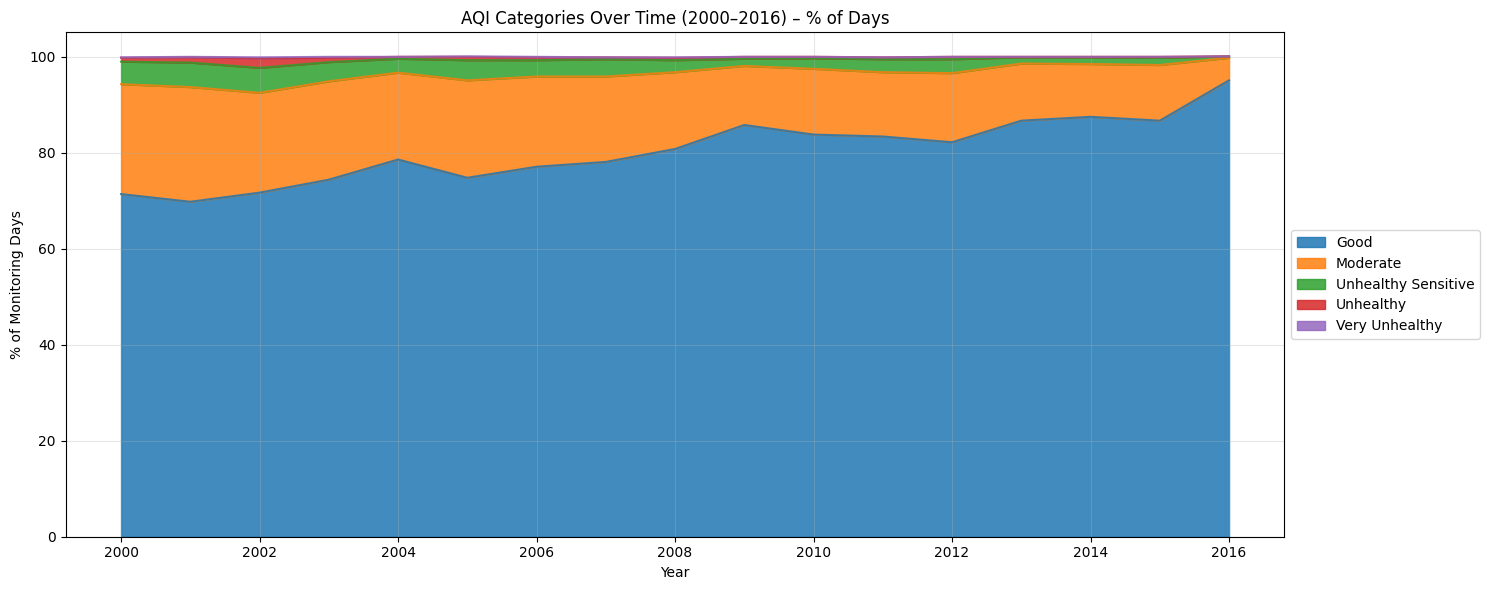

In [128]:
yearly_aqi[['Good','Moderate','Unhealthy Sensitive','Unhealthy','Very Unhealthy']].plot(
    kind='area', stacked=True, alpha=0.85, figsize=(15,6)
)
plt.title('AQI Categories Over Time (2000–2016) – % of Days')
plt.ylabel('% of Monitoring Days')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.show()


<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
AQI category trends show a clear improvement in everyday air quality: in 2000 about 5.6% of monitoring days were ‘Unhealthy or worse', but by 2016 this fell to only 0.3%, while the share of Good days climbed into the mid‑80s and reaches about 95% by 2016, with Moderate days shrinking to under 5% in the final year.
</div>

In [129]:
# ==========================================
# 2.5.2 EXTREME AQI DAYS ANALYSIS
# ==========================================

print("=== FINDING TOP 5% WORST AQI DAYS ===")

# 95th percentile threshold for "extreme" days
aqi_threshold = df['AQI_overall'].quantile(0.95)
print(f"95th percentile AQI threshold: {aqi_threshold:.1f}")
print(f"Extreme days (AQI ≥ {aqi_threshold:.1f}): {len(df[df['AQI_overall'] >= aqi_threshold]):,} days")

# Filter to extreme days only
extreme_days = df[df['AQI_overall'] >= aqi_threshold].copy()
print(f"Extreme days represent: {len(extreme_days)/len(df)*100:.1f}% of total")

print("\n=== WHERE/WHEN DO EXTREMES OCCUR? ===")
print("By YEAR:")
print(extreme_days['Year'].value_counts().sort_index().head())

print("\nBy SEASON:")
print(extreme_days['Seasons'].value_counts())

print("\nBy STATE (top 10):")
print(extreme_days['State'].value_counts().head(10))

print("\nBy COUNTY (top 5):")
print(extreme_days['County'].value_counts().head())


=== FINDING TOP 5% WORST AQI DAYS ===
95th percentile AQI threshold: 90.0
Extreme days (AQI ≥ 90.0): 91,797 days
Extreme days represent: 5.3% of total

=== WHERE/WHEN DO EXTREMES OCCUR? ===
By YEAR:
Year
2000    7614
2001    8154
2002    9088
2003    6477
2004    4408
Name: count, dtype: int64

By SEASON:
Seasons
Summer    57912
Spring    17234
Fall      14101
Winter     2550
Name: count, dtype: int64

By STATE (top 10):
State
California        31262
Pennsylvania      16320
Texas              5696
North Carolina     4266
New York           3378
Arizona            3040
Oklahoma           2432
Illinois           2328
Virginia           2094
Missouri           2048
Name: count, dtype: int64

By COUNTY (top 5):
County
Riverside         7238
San Bernardino    6648
Los Angeles       5322
Mecklenburg       3784
Fresno            3536
Name: count, dtype: int64


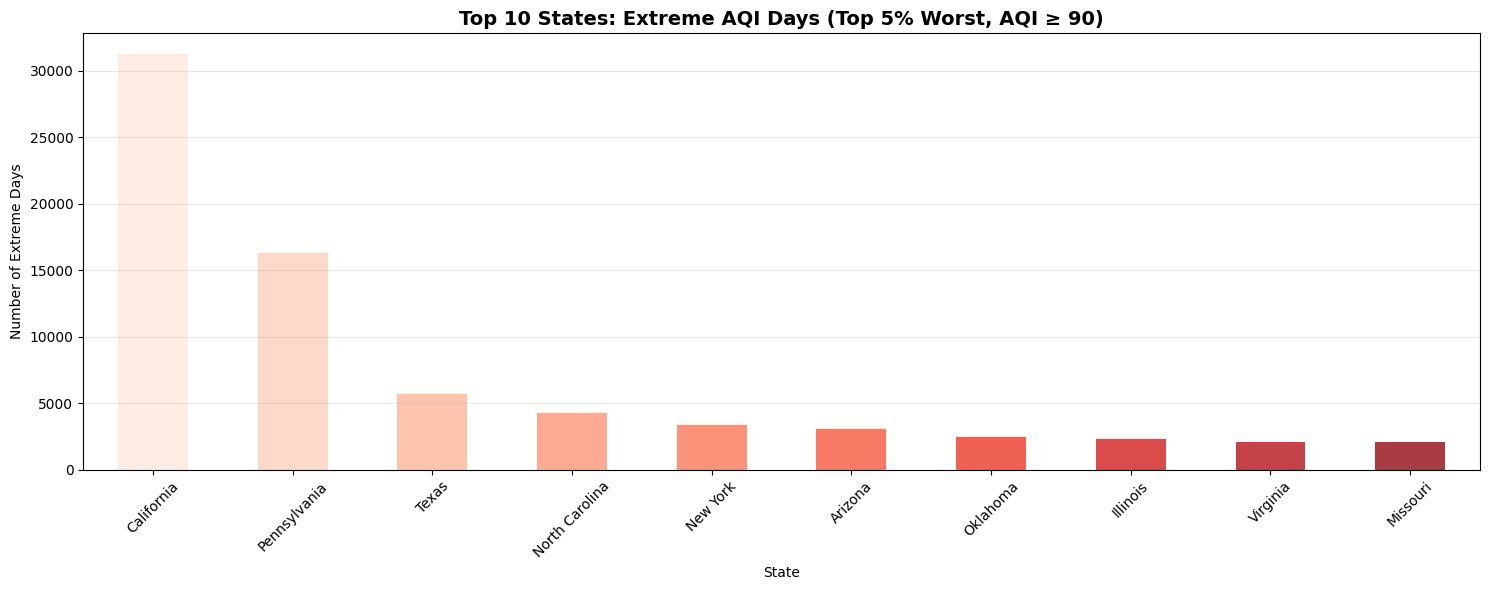

In [130]:
# ==========================================
# EXTREME DAYS VISUALIZATION
# ==========================================

# VISUAL 1: Top 10 states - extreme AQI days
plt.figure(figsize=(15, 6))
top_states = extreme_days['State'].value_counts().head(10)
top_states.plot(kind='bar', color=sns.color_palette("Reds",n_colors=10), alpha=0.8)
plt.title('Top 10 States: Extreme AQI Days (Top 5% Worst, AQI ≥ 90)', fontsize=14, weight='bold')
plt.ylabel('Number of Extreme Days')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


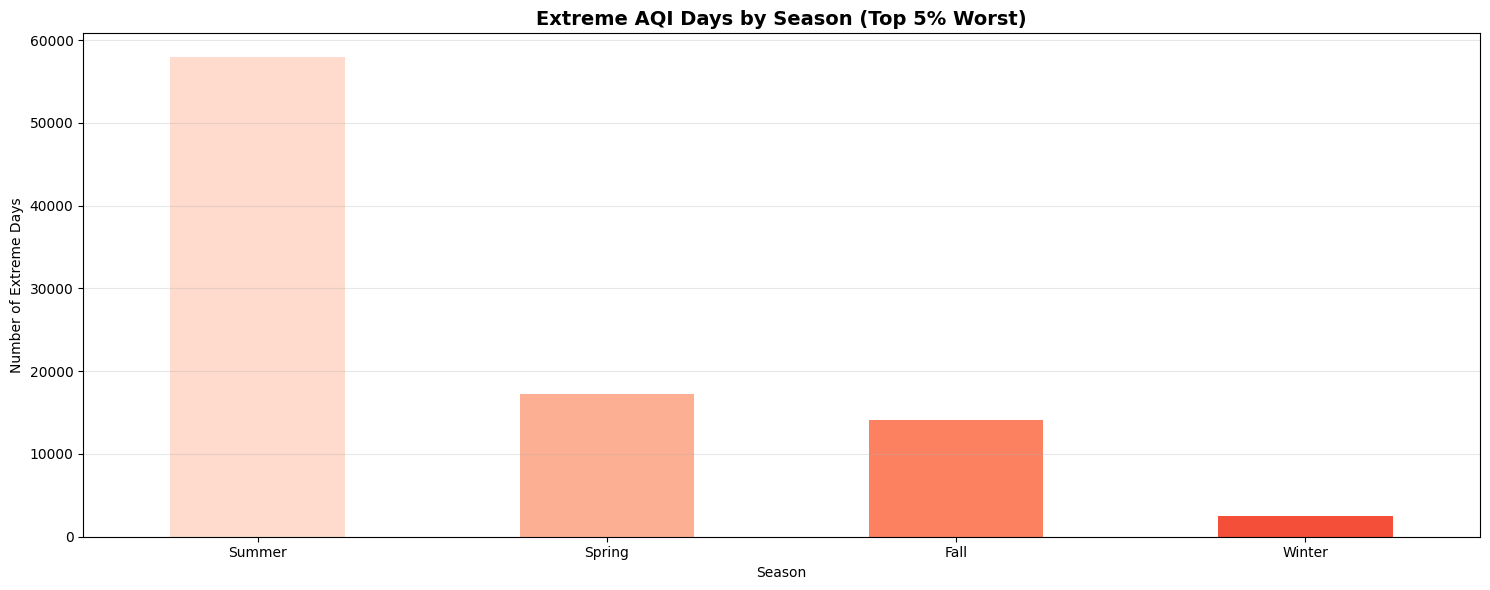

In [131]:
# VISUAL 2: Extreme days by season
plt.figure(figsize=(15, 6))
season_counts = extreme_days['Seasons'].value_counts()
season_counts.plot(kind='bar', color=sns.color_palette("Reds"))
plt.title('Extreme AQI Days by Season (Top 5% Worst)', fontsize=14, weight='bold')
plt.ylabel('Number of Extreme Days')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 12px; margin: 20px 0; color: white; border-left: 5px solid #ff6b6b;'>
<strong>💡 KEY INSIGHT:</strong><br>
California dominates extreme events with 31,262 days in the top 5% worst AQI (AQI ≥ 90, 34% of all extremes), followed by Pennsylvania (16,320 days), showing that while overall air quality improved nationwide, high-AQI episodes remain heavily concentrated in specific states.

Summer accounts for 63% of extreme days (57,912 days), with Spring/Fall contributing far less and Winter barely registering (2,550 days), confirming that photochemical ozone formation during warm months drives virtually all severe air quality episodes.

The worst counties for extreme AQI days are Riverside CA (7,238 days), San Bernardino CA (6,648 days), and Los Angeles CA (5,322 days) all California hotspots while Mecklenburg NC (3,784 days) rounds out the top 5, highlighting both urban basin geography and industrial hotspots as key drivers.
</div>